In [1]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score,precision_score,roc_auc_score,classification_report,roc_curve,auc,recall_score,confusion_matrix


# Step 1 : Data Cleaning

### Exploring data

In [2]:
## Import the data
telecom=pd.read_csv('telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
## inspecting data frame
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
##shape of data frame
telecom.shape

(99999, 226)

In [5]:
telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

### Identifying Columns based on datatype

In [6]:
## Gettign distinct dataypes
telecom.dtypes.value_counts()

float64    179
int64       35
object      12
dtype: int64

In [7]:
## getting all object dtypes columns
object_cols=telecom.select_dtypes('object').columns
date_cols=object_cols.copy()
date_cols
## all object dtype column are actually date columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

### Converting all date columns to datetime format

In [8]:
## changing the object datype to date for date columns
telecom[date_cols]=telecom[date_cols].apply(pd.to_datetime)

In [9]:
## checking if the column data type has chnaged
telecom.dtypes.value_counts()

float64           179
int64              35
datetime64[ns]     12
dtype: int64

In [10]:
## ID column based on the data dictionary
id_columns=['mobile_number','circle_id']

### Identifying real categorical columns in dataframe which are having numerical values
- identification done based on unique values in each column
- creating a dataframe with columns and there unique values

In [11]:
## gettimg unique value count of each columninto a dataframe
unique_df=pd.DataFrame(telecom.nunique())
unique_df.reset_index(inplace=True)
unique_df.columns=['features','unique_count']
unique_df

,features,unique_count
0,mobile_number,99999
1,circle_id,1
2,loc_og_t2o_mou,1
3,std_og_t2o_mou,1
4,loc_ic_t2o_mou,1
5,last_date_of_month_6,1
6,last_date_of_month_7,1
7,last_date_of_month_8,1
8,last_date_of_month_9,1
9,arpu_6,85681


In [12]:
# creating categorical columns based on unique value count
# we are considering all columns with unique value count less than equal to 35 as catgeorical columns
# we ahve choosen 35 because sachet_2g_7 is having unique value =35 ( this is a service scheme )
categorical_cols=unique_df[unique_df['unique_count']<=35]['features']

# retaining only float and int data types as date is not categorical data
categorical_cols=list(telecom[categorical_cols].select_dtypes(include=['int64','float64']).columns)
categorical_cols

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9',
 'count_rech_2g_6',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_2g_9',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_2g_9',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'monthly_3g_9',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'sachet_3g_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [13]:
# Getting numerical column with unique value >35
numerical_cols=unique_df[unique_df['unique_count']>35]['features']

# Retaining only float and int data types as date is not numerical data
numerical_cols=list(telecom[numerical_cols].select_dtypes(include=['int64','float64']).columns)
numerical_cols

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_

In [14]:
## removing id columns from categorical an numerical columns
## id columns are circle_id and Mobile number as identified before
numerical_cols.remove('mobile_number')
categorical_cols.remove('circle_id')

### Validation if all columns as accounted for

In [15]:
print("Number of all columns after idetification of datatypes: ",len(id_columns)+len(numerical_cols)+len(categorical_cols)\
     +len(date_cols))
print("Number of all columns in original DataFrame: ",telecom.shape[1])

Number of all columns after idetification of datatypes:  226
Number of all columns in original DataFrame:  226


### Checking for null values

In [16]:
## checking the missing value column
telecom.isnull().sum()*100/(telecom.shape[0])

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

### Handling Missing Values

In [17]:
## selecting all recharge columns
rechrage_cols=telecom.filter(like='rech').columns
## remove the date columns
##rechrage_cols=list(telecom[rechrage_cols].select_dtypes(include=['int64','float64']).columns)
rechrage_cols

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [18]:
## checking the count of missing in recharge columns
telecom[rechrage_cols].isnull().sum()

total_rech_num_6                0
total_rech_num_7                0
total_rech_num_8                0
total_rech_num_9                0
total_rech_amt_6                0
total_rech_amt_7                0
total_rech_amt_8                0
total_rech_amt_9                0
max_rech_amt_6                  0
max_rech_amt_7                  0
max_rech_amt_8                  0
max_rech_amt_9                  0
date_of_last_rech_6          1607
date_of_last_rech_7          1767
date_of_last_rech_8          3622
date_of_last_rech_9          4760
date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
total_rech_data_6           74846
total_rech_data_7           74428
total_rech_data_8           73660
total_rech_data_9           74077
max_rech_data_6             74846
max_rech_data_7             74428
max_rech_data_8             73660
max_rech_data_9             74077
count_rech_2g_6             74846
count_rech_2g_

###  If date of recharge is missing along with other recharge columns we can assume recharge was not done and can impute missing with 0
- checking for all 4 month columns if the count of misisng is same below


telecom.loc[telecom['total_rech_data_6'].isnull() & telecom['date_of_last_rech_data_6'].isnull() \
            &  telecom['max_rech_data_6'].isnull() & telecom['count_rech_2g_6'].isnull() \
            &  telecom['count_rech_3g_6'].isnull() & telecom['av_rech_amt_data_6'].isnull() \
            ,['total_rech_data_6', 'date_of_last_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6'\
            'av_rech_amt_data_6']].shape

telecom.loc[telecom['total_rech_data_7'].isnull() & telecom['date_of_last_rech_data_7'].isnull() \
            &  telecom['max_rech_data_7'].isnull() & telecom['count_rech_2g_7'].isnull() \
            &  telecom['count_rech_3g_7'].isnull() & telecom['av_rech_amt_data_7'].isnull() \
            ,['total_rech_data_7', 'date_of_last_rech_data_7','max_rech_data_7','count_rech_2g_7','count_rech_3g_7'\
            'av_rech_amt_data_7']].shape

telecom.loc[telecom['total_rech_data_8'].isnull() & telecom['date_of_last_rech_data_8'].isnull() \
            &  telecom['max_rech_data_8'].isnull() & telecom['count_rech_2g_8'].isnull() \
            &  telecom['count_rech_3g_8'].isnull() & telecom['av_rech_amt_data_8'].isnull() \
            ,['total_rech_data_8', 'date_of_last_rech_data_8','max_rech_data_8','count_rech_2g_8','count_rech_3g_8'\
            'av_rech_amt_data_8']].shape

telecom.loc[telecom['total_rech_data_9'].isnull() & telecom['date_of_last_rech_data_9'].isnull() \
            &  telecom['max_rech_data_9'].isnull() & telecom['count_rech_2g_9'].isnull() \
            &  telecom['count_rech_3g_9'].isnull() & telecom['av_rech_amt_data_9'].isnull() \
            ,['total_rech_data_9', 'date_of_last_rech_data_9','max_rech_data_9','count_rech_2g_9','count_rech_3g_9'\
            'av_rech_amt_data_9']].shape

## Inference
- From above it is confirmed that dates corresponding to recharge columns are missing, hence imputing them with 0
- Also from the above we could see all data related recharge are missing values and count of missing is same across
- Feature date_of_last_rech for all months are not getting imputed with 0.

In [19]:
# getting all columns for zero imputing
Zero_impute=pd.DataFrame(telecom[rechrage_cols].isnull().sum()>0)
Zero_impute.reset_index(inplace=True)
Zero_impute.columns=['column','boolean']
Zero_impute=list(Zero_impute[Zero_impute['boolean']==True]['column'])

# not considereing date columns
unwanted = {'date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'}
Zero_impute = [e for e in Zero_impute if e not in unwanted]

In [20]:
## imputing null column with 0
telecom[Zero_impute]=telecom[Zero_impute].apply(lambda x : x.fillna(0))

In [21]:
telecom[rechrage_cols].isnull().sum()

total_rech_num_6               0
total_rech_num_7               0
total_rech_num_8               0
total_rech_num_9               0
total_rech_amt_6               0
total_rech_amt_7               0
total_rech_amt_8               0
total_rech_amt_9               0
max_rech_amt_6                 0
max_rech_amt_7                 0
max_rech_amt_8                 0
max_rech_amt_9                 0
date_of_last_rech_6         1607
date_of_last_rech_7         1767
date_of_last_rech_8         3622
date_of_last_rech_9         4760
date_of_last_rech_data_6       0
date_of_last_rech_data_7       0
date_of_last_rech_data_8       0
date_of_last_rech_data_9       0
total_rech_data_6              0
total_rech_data_7              0
total_rech_data_8              0
total_rech_data_9              0
max_rech_data_6                0
max_rech_data_7                0
max_rech_data_8                0
max_rech_data_9                0
count_rech_2g_6                0
count_rech_2g_7                0
count_rech

In [22]:
##dropping date and ID column as it is of no use in modelling as we are modelling on monthly basis
telecom.drop(id_columns, axis=1,  inplace = True)
telecom.drop(date_cols, axis=1,  inplace = True)

In [23]:
categorical_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9',
 'count_rech_2g_6',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_2g_9',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_2g_9',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'monthly_3g_9',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'sachet_3g_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [24]:
## getting real categorical columns from the categorical_cols which was obtained using unique values
## from looking at the data dictionary
# below cols are not categorical but numerical so removing these from categorical_cols and adding to numerical cols
temp_numerical=['count_rech_2g_6','count_rech_2g_8','count_rech_2g_9','count_rech_3g_6','count_rech_3g_7','count_rech_3g_7'\
 ,'count_rech_3g_7','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9','std_og_t2c_mou_6'\
 ,'std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'\
                ,'std_og_t2c_mou_6','std_og_t2c_mou_7','count_rech_3g_8','count_rech_3g_9']

final_categorical_col=[col for col in categorical_cols if col not in temp_numerical ]
final_categorical_col

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_2g_9',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_2g_9',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'monthly_3g_9',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'sachet_3g_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [25]:
## checking null values in final_categorical_col
telecom[final_categorical_col].isnull().sum()/len(telecom)

night_pck_user_6    0.748467
night_pck_user_7    0.744287
night_pck_user_8    0.736607
night_pck_user_9    0.740777
monthly_2g_6        0.000000
monthly_2g_7        0.000000
monthly_2g_8        0.000000
monthly_2g_9        0.000000
sachet_2g_6         0.000000
sachet_2g_7         0.000000
sachet_2g_8         0.000000
sachet_2g_9         0.000000
monthly_3g_6        0.000000
monthly_3g_7        0.000000
monthly_3g_8        0.000000
monthly_3g_9        0.000000
sachet_3g_6         0.000000
sachet_3g_7         0.000000
sachet_3g_8         0.000000
sachet_3g_9         0.000000
fb_user_6           0.748467
fb_user_7           0.744287
fb_user_8           0.736607
fb_user_9           0.740777
dtype: float64

## Inference
- From above we can see night_pck_user and fb_user for all months has null values
- we can impute null values as -1 as another category.

In [26]:
# imputing nullas -1 as another caetgory
telecom[final_categorical_col]=telecom[final_categorical_col].fillna(-1)

In [27]:
## rechecking checking null values in final_categorical_col
telecom[final_categorical_col].isnull().sum()/len(telecom)

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
monthly_2g_6        0.0
monthly_2g_7        0.0
monthly_2g_8        0.0
monthly_2g_9        0.0
sachet_2g_6         0.0
sachet_2g_7         0.0
sachet_2g_8         0.0
sachet_2g_9         0.0
monthly_3g_6        0.0
monthly_3g_7        0.0
monthly_3g_8        0.0
monthly_3g_9        0.0
sachet_3g_6         0.0
sachet_3g_7         0.0
sachet_3g_8         0.0
sachet_3g_9         0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

In [28]:
## getiting the numerical columns which were misclassified as categorical columns beacuse of unique value counts
numerical_col1=[col for col in temp_numerical if col not in numerical_cols ]
numerical_col1

['count_rech_2g_6',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_7',
 'count_rech_3g_7',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'count_rech_3g_8',
 'count_rech_3g_9']

In [29]:
len(numerical_cols)+len(numerical_col1)

192

In [30]:
## final numerical columns
Final_numerical_cols=numerical_cols+numerical_col1
len(Final_numerical_cols)

192

In [31]:
## checking unique values in dataframe
telecom.nunique()

loc_og_t2o_mou            1
std_og_t2o_mou            1
loc_ic_t2o_mou            1
arpu_6                85681
arpu_7                85308
arpu_8                83615
arpu_9                79937
onnet_mou_6           24313
onnet_mou_7           24336
onnet_mou_8           24089
onnet_mou_9           23565
offnet_mou_6          31140
offnet_mou_7          31023
offnet_mou_8          30908
offnet_mou_9          30077
roam_ic_mou_6          6512
roam_ic_mou_7          5230
roam_ic_mou_8          5315
roam_ic_mou_9          4827
roam_og_mou_6          8038
roam_og_mou_7          6639
roam_og_mou_8          6504
roam_og_mou_9          5882
loc_og_t2t_mou_6      13539
loc_og_t2t_mou_7      13411
loc_og_t2t_mou_8      13336
loc_og_t2t_mou_9      12949
loc_og_t2m_mou_6      20905
loc_og_t2m_mou_7      20637
loc_og_t2m_mou_8      20544
loc_og_t2m_mou_9      20141
loc_og_t2f_mou_6       3860
loc_og_t2f_mou_7       3863
loc_og_t2f_mou_8       3807
loc_og_t2f_mou_9       3758
loc_og_t2c_mou_6    

In [32]:
## Drop columns having just one unique value

cols_to_drop=list(telecom.apply(lambda column: False if column.nunique() < 2 else True))
telecom=telecom.loc[:, cols_to_drop]
telecom.shape

(99999, 201)

In [33]:
##Rechecking unique values
telecom.nunique()

arpu_6                85681
arpu_7                85308
arpu_8                83615
arpu_9                79937
onnet_mou_6           24313
onnet_mou_7           24336
onnet_mou_8           24089
onnet_mou_9           23565
offnet_mou_6          31140
offnet_mou_7          31023
offnet_mou_8          30908
offnet_mou_9          30077
roam_ic_mou_6          6512
roam_ic_mou_7          5230
roam_ic_mou_8          5315
roam_ic_mou_9          4827
roam_og_mou_6          8038
roam_og_mou_7          6639
roam_og_mou_8          6504
roam_og_mou_9          5882
loc_og_t2t_mou_6      13539
loc_og_t2t_mou_7      13411
loc_og_t2t_mou_8      13336
loc_og_t2t_mou_9      12949
loc_og_t2m_mou_6      20905
loc_og_t2m_mou_7      20637
loc_og_t2m_mou_8      20544
loc_og_t2m_mou_9      20141
loc_og_t2f_mou_6       3860
loc_og_t2f_mou_7       3863
loc_og_t2f_mou_8       3807
loc_og_t2f_mou_9       3758
loc_og_t2c_mou_6       2235
loc_og_t2c_mou_7       2426
loc_og_t2c_mou_8       2516
loc_og_t2c_mou_9    

### Dropping features with more than 70% missing values

# Step 2 : Filtering of high value customers (Threshold > 70 percentile)

In [34]:
threshold = 0.7
initial_columns = telecom.shape[1]
include_columns = list(telecom.apply(lambda column: True if column.isnull().sum()/telecom.shape[0] < threshold else False))

In [35]:
telecom = telecom.loc[:, include_columns]
dropped_columns = initial_columns - telecom.shape[1]
print("Number of columns dropped : ", dropped_columns)

Number of columns dropped :  8


In [36]:
telecom.shape

(99999, 193)

In [37]:
missing_columns=pd.DataFrame(telecom.isnull().sum()*100/len(telecom))
missing_columns.columns=['Percentage_missing']
actual_missing=list(missing_columns[missing_columns.Percentage_missing>0].index)

In [38]:
telecom[actual_missing].isnull().sum()

onnet_mou_6         3937
onnet_mou_7         3859
onnet_mou_8         5378
onnet_mou_9         7745
offnet_mou_6        3937
offnet_mou_7        3859
offnet_mou_8        5378
offnet_mou_9        7745
roam_ic_mou_6       3937
roam_ic_mou_7       3859
roam_ic_mou_8       5378
roam_ic_mou_9       7745
roam_og_mou_6       3937
roam_og_mou_7       3859
roam_og_mou_8       5378
roam_og_mou_9       7745
loc_og_t2t_mou_6    3937
loc_og_t2t_mou_7    3859
loc_og_t2t_mou_8    5378
loc_og_t2t_mou_9    7745
loc_og_t2m_mou_6    3937
loc_og_t2m_mou_7    3859
loc_og_t2m_mou_8    5378
loc_og_t2m_mou_9    7745
loc_og_t2f_mou_6    3937
loc_og_t2f_mou_7    3859
loc_og_t2f_mou_8    5378
loc_og_t2f_mou_9    7745
loc_og_t2c_mou_6    3937
loc_og_t2c_mou_7    3859
loc_og_t2c_mou_8    5378
loc_og_t2c_mou_9    7745
loc_og_mou_6        3937
loc_og_mou_7        3859
loc_og_mou_8        5378
loc_og_mou_9        7745
std_og_t2t_mou_6    3937
std_og_t2t_mou_7    3859
std_og_t2t_mou_8    5378
std_og_t2t_mou_9    7745


In [39]:
## imputing with mean for missing values
for i in telecom.columns[telecom.isnull().any(axis=0)]:     #---Applying Only on variables with NaN values
    telecom[i].fillna(telecom[i].median(),inplace=True)

In [40]:
telecom.isnull().sum().sort_values(ascending=False)

arpu_6                0
std_ic_t2f_mou_7      0
total_rech_num_9      0
total_rech_amt_6      0
total_rech_amt_7      0
total_rech_amt_8      0
total_rech_amt_9      0
max_rech_amt_6        0
max_rech_amt_7        0
max_rech_amt_8        0
max_rech_amt_9        0
last_day_rch_amt_6    0
last_day_rch_amt_7    0
last_day_rch_amt_8    0
last_day_rch_amt_9    0
total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
total_rech_num_8      0
total_rech_num_7      0
total_rech_num_6      0
spl_ic_mou_6          0
std_ic_t2f_mou_9      0
std_ic_mou_6          0
std_ic_mou_7          0
std_ic_mou_8          0
std_ic_mou_9          0
total_ic_mou_6        0
total_ic_mou_7        0
total_ic_mou_8        0
total_ic_mou_9        0
spl_ic_mou_7          0
ic_others_9           0
spl_ic_mou_8          0
spl_ic_mou_9          0
isd_ic_mou_6          0
isd_ic_mou_7    

### Filtering of high value customers

In [41]:
## Filtering of high vlaue customers 
## total_rech_amt_6,total_rech_amt_7 are  2 columns to be used to get avg recharge amount in first 2 months
telecom['avg_rech_amt_6_7']=(telecom.total_rech_amt_6+telecom.total_rech_amt_7)/2


In [42]:
##checking 70th percentile value
print("recharge amount at 70th percentile: {0}".format(telecom['avg_rech_amt_6_7'].quantile(0.7)))

recharge amount at 70th percentile: 368.5


In [43]:
## creating new dataframe having datset with recharge amt > 70 percentile of recharge amt of 5 and 6 month
telecom_filtered=telecom.loc[telecom.avg_rech_amt_6_7 >= telecom.avg_rech_amt_6_7.quantile(0.7), :]
telecom_filtered = telecom_filtered.reset_index(drop=True)
telecom_filtered.shape

(30011, 194)

In [44]:
## checking newly ccreated datafrfame
telecom_filtered.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.16,325.91,87.29,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,61.84,4.30,23.29,12.01,0.00,49.89,31.76,49.14,2.50,6.66,20.08,16.68,0.00,60.86,75.14,77.84,8.41,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,15.66,217.56,221.49,121.19,56.61,152.16,101.46,39.53,0.96,427.88,355.23,188.04,91.64,36.89,11.83,30.39,0.00,91.44,126.99,141.33,1.74,52.19,34.24,22.21,0.0,180.54,173.08,193.94,5.38,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.0,1185.0
1,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,

In [45]:
telecom_filtered.filter(like='vol').columns


Index(['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_2g_mb_9',
       'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'vol_3g_mb_9'],
      dtype='object')

In [46]:
## droping avg_rech_amt_6_7 as it was used to derieve high value customer
telecom_filtered.drop('avg_rech_amt_6_7',inplace=True,axis=1)

# Step 3 : Derive churn 
- usage based churn
- churn =1 and non churn =0
- churn will be derived based on 9th month data
- churn will be derived based on total_og_mou_9,total_ic_mou_9,vol_2g_mb_9,vol_3g_mb_9
- If above column are 0 then customer is churn

In [47]:
churn_identifier=['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
## if column sum ==0 then churn is set to 1 else 0
telecom_filtered['churn']=np.where(telecom_filtered[churn_identifier].sum(axis=1) == 0, 1, 0 )
telecom_filtered.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.16,325.91,87.29,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,61.84,4.30,23.29,12.01,0.00,49.89,31.76,49.14,2.50,6.66,20.08,16.68,0.00,60.86,75.14,77.84,8.41,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,15.66,217.56,221.49,121.19,56.61,152.16,101.46,39.53,0.96,427.88,355.23,188.04,91.64,36.89,11.83,30.39,0.00,91.44,126.99,141.33,1.74,52.19,34.24,22.21,0.0,180.54,173.08,193.94,5.38,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.0,1
1,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0

### Dropping columns related to 9th month after identification of churn customers

In [48]:
## dropping 9the month
telecom_filtered.drop((telecom_filtered.filter(like='_9').columns| telecom_filtered.filter(like='sep').columns),\
                      inplace=True,axis=1)

In [49]:
## getting categoricala nd numerical data fro EDA based on unique vale for eacch feature
## gettimg unique value count of each columninto a dataframe
unique_df=pd.DataFrame(telecom_filtered.nunique())
unique_df.reset_index(inplace=True)
unique_df.columns=['features','unique_count']
unique_df

,features,unique_count
0,arpu_6,29261
1,arpu_7,29260
2,arpu_8,28405
3,onnet_mou_6,18813
4,onnet_mou_7,18938
5,onnet_mou_8,17604
6,offnet_mou_6,22455
7,offnet_mou_7,22651
8,offnet_mou_8,21514
9,roam_ic_mou_6,4338


In [50]:
## final categorical columns after removing he 9th month columns
unwanted=['night_pck_user_9','monthly_2g_9','sachet_2g_9','monthly_3g_9','sachet_3g_9','fb_user_9']

final_categorical_col= [col for col in final_categorical_col if col not in unwanted]
final_categorical_col

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

### Identify churn ratio (Data Imbalance)

In [51]:
print("Churn Ratio:")
print(round(telecom_filtered['churn'].value_counts(normalize=True)*100,2))

Churn Ratio:
0    91.36
1     8.64
Name: churn, dtype: float64


#### Inference
- only 8.64 % are churned
- class imbalacce is present which needs to be handled

In [52]:
telecom_filtered.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,1
1,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,-1.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,-1.0,1.0,1.0,315,21.03,910.65,122.16,0
2,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11

# Step 4 : Data Prepration

## EDA

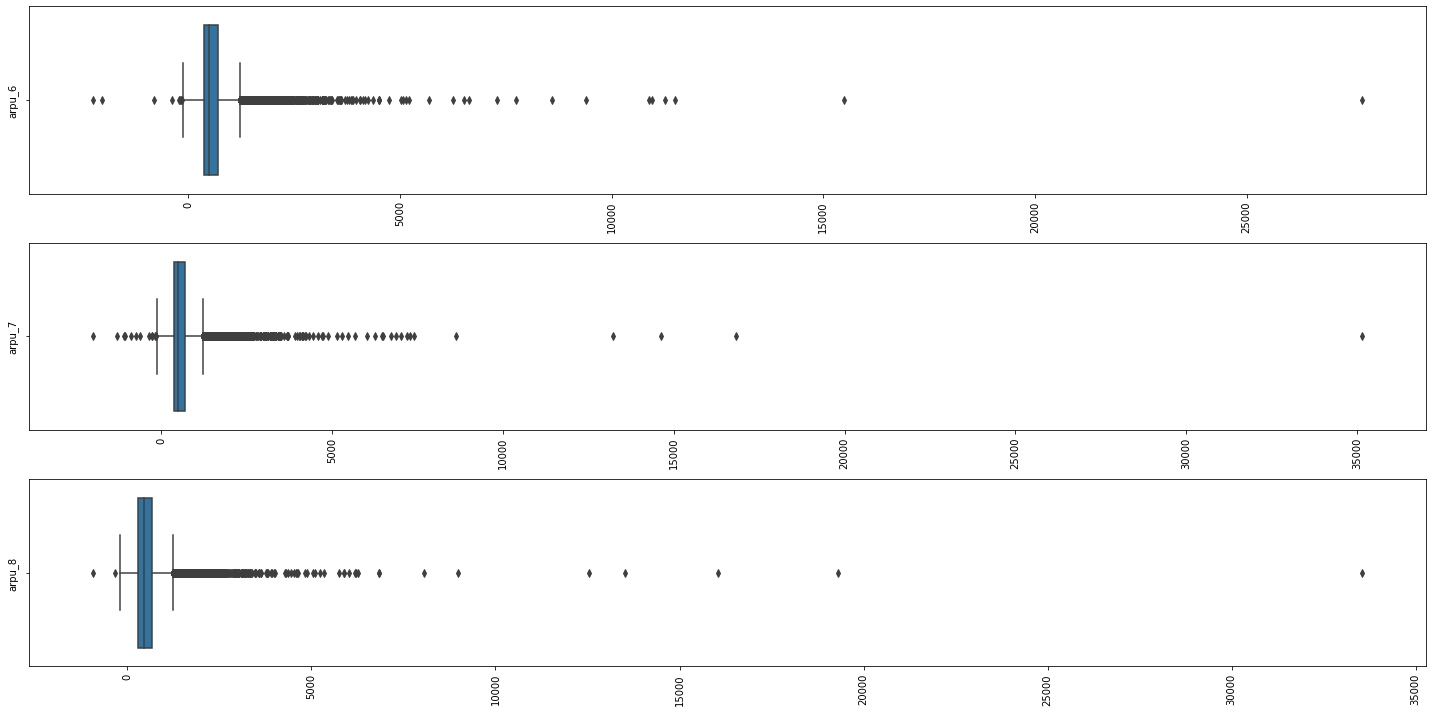

In [53]:
fig, axis = plt.subplots(3,1, figsize = (20,10))


plt1 = sns.boxplot(x= 'arpu_6', data = telecom_filtered, ax = axis[0])
plt1.set(xlabel = '', ylabel= 'arpu_6')

plt1 = sns.boxplot(x= 'arpu_7', data = telecom_filtered, ax = axis[1])
plt1.set(xlabel = '', ylabel= 'arpu_7')


plt1 = sns.boxplot(x= 'arpu_8', data = telecom_filtered
                   , ax = axis[2])
plt1.set(xlabel = '', ylabel= 'arpu_8')


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()

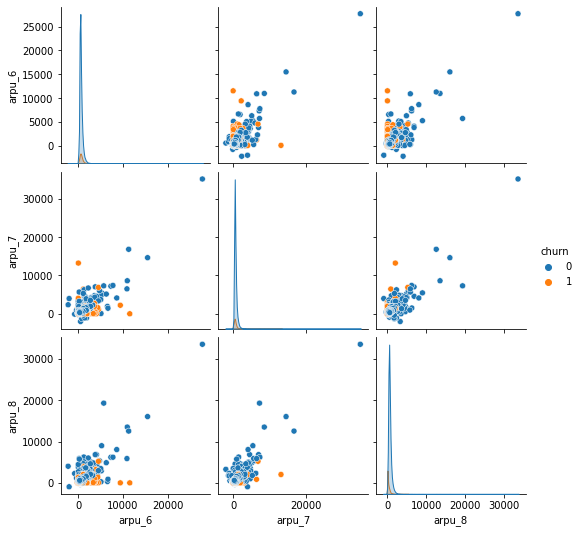

In [54]:
sns.pairplot(data=telecom_filtered[['arpu_6','arpu_7','arpu_8','churn']],hue='churn')
plt.show()

## Inference
- from scatter plots its clear that there is some linearity in avg revenue per user data
- IQR is small and can see some outliers

### incoming_mou calls distribution

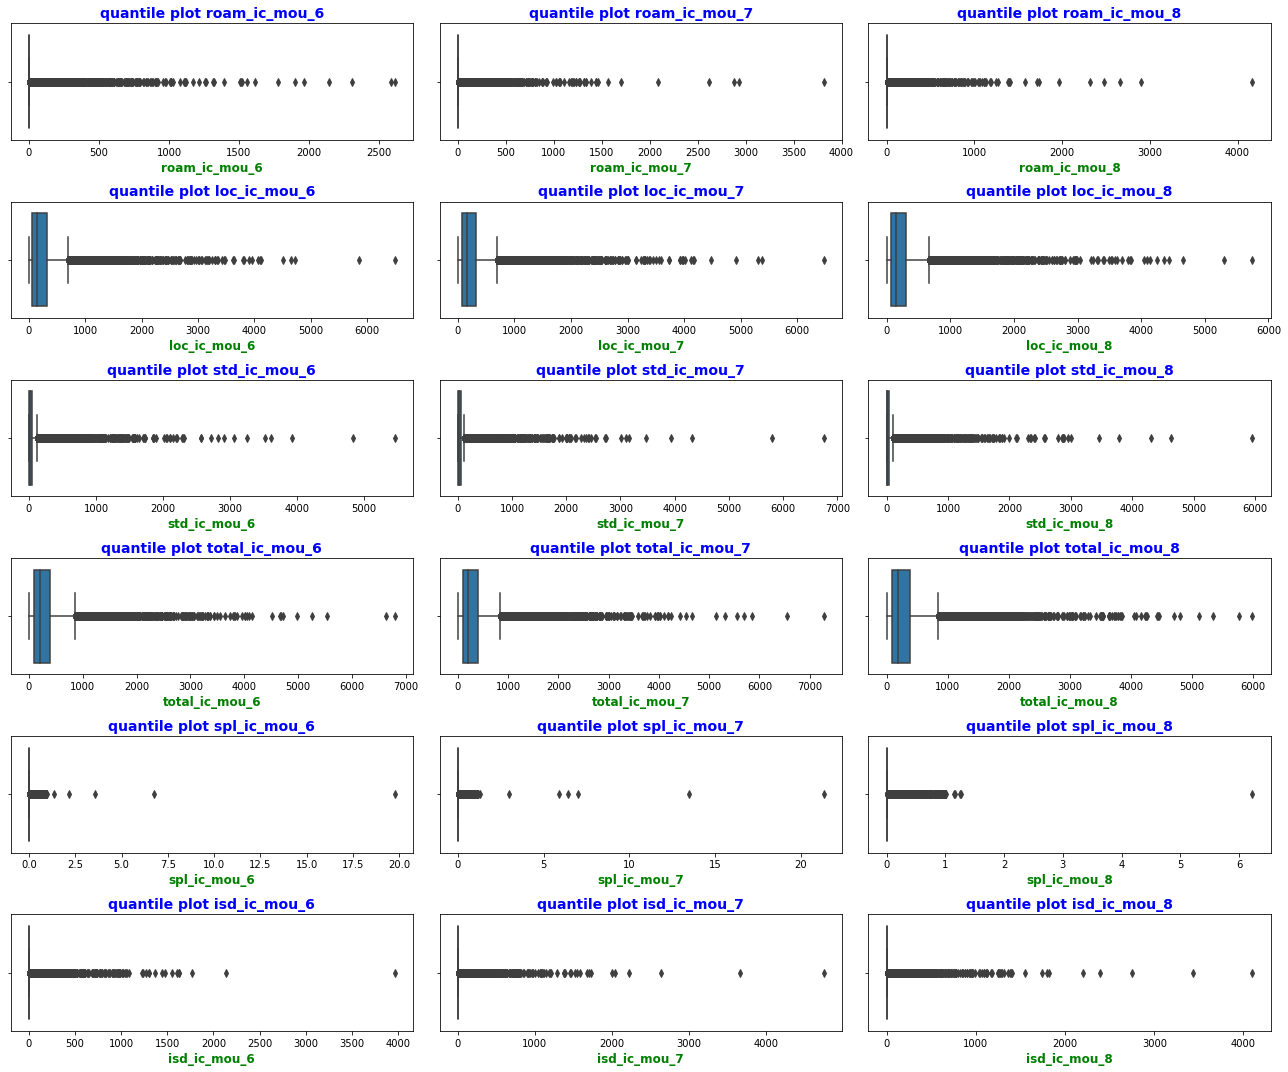

In [55]:
## incoming colls box plot for outliers detection
incoming_cols=telecom_filtered.filter(like='ic_mou').columns

plt.figure(figsize=(18,15))
for i in enumerate(incoming_cols):
        plt.subplot(6,3,i[0]+1)
        plt.title('quantile plot'+' '+ i[1],fontweight='bold',color='b',size=14)
        plt.xlabel(i[1],fontweight='bold',color='g',size=12)
        sns.boxplot(telecom_filtered[i[1]])
        
plt.tight_layout() #auto matically adjust subplots into figure area

plt.show()

## Inference
- from plots we can see almost all feilds have high percentage of outliers
- IQR is very small

### plots for outgoinf_call_mou


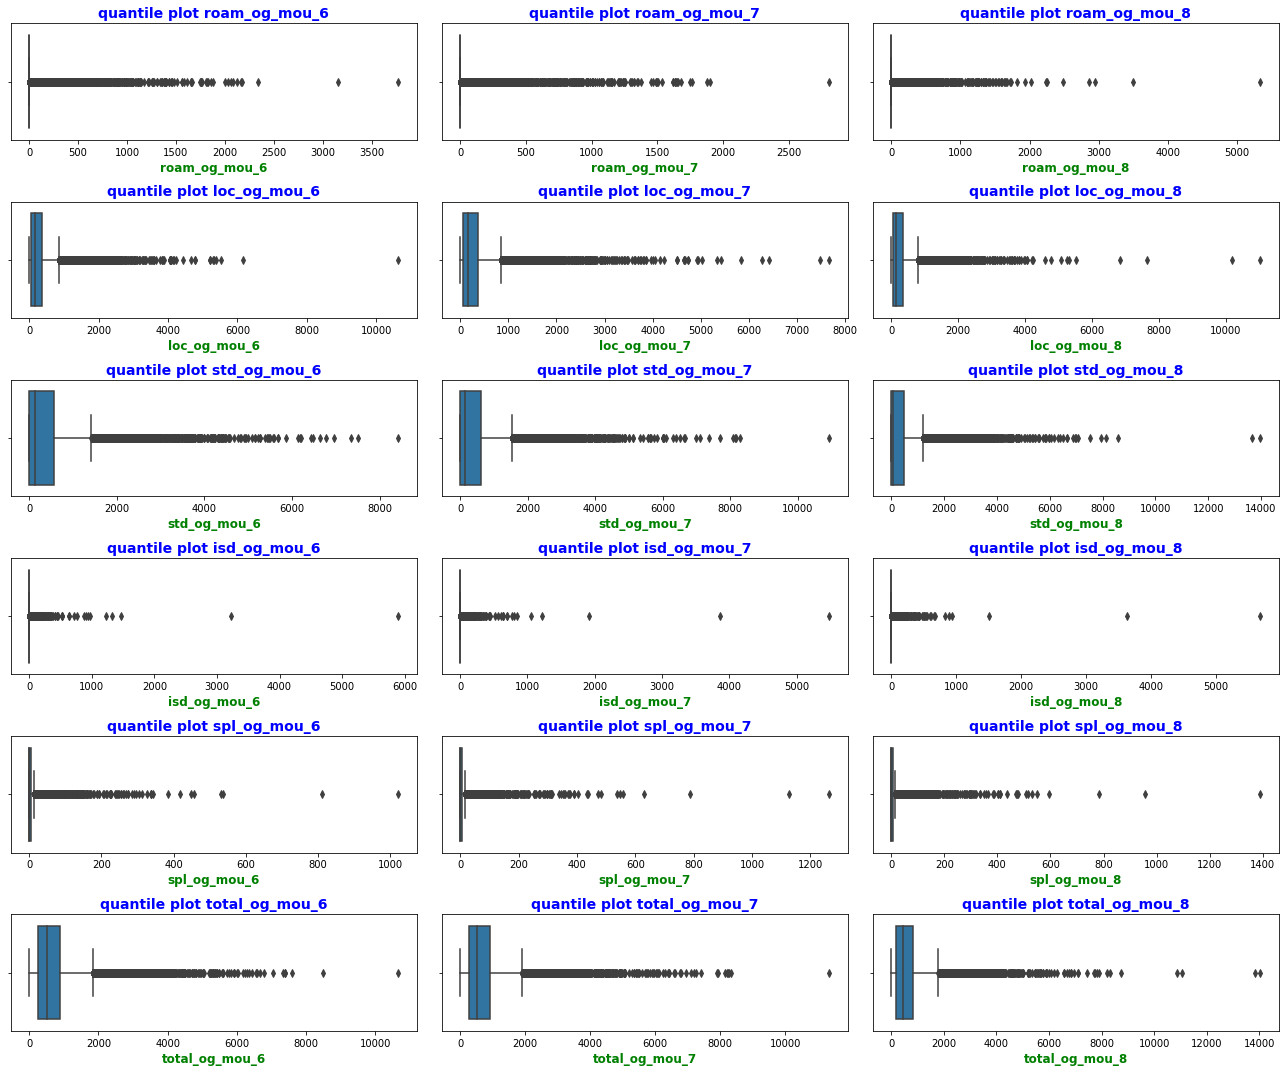

In [56]:
## outgoing colls box plot for outliers detection
incoming_cols=telecom_filtered.filter(like='og_mou').columns

plt.figure(figsize=(18,15))
for i in enumerate(incoming_cols):
        plt.subplot(6,3,i[0]+1)
        plt.title('quantile plot'+' '+ i[1],fontweight='bold',color='b',size=14)
        plt.xlabel(i[1],fontweight='bold',color='g',size=12)
        sns.boxplot(telecom_filtered[i[1]])
        
plt.tight_layout() #auto matically adjust subplots into figure area

plt.show()

### inference
- Total og and roam og show a small box with considereable IQR 
- rest all the columns IQR is very less or the spread is less.

### Internet usage

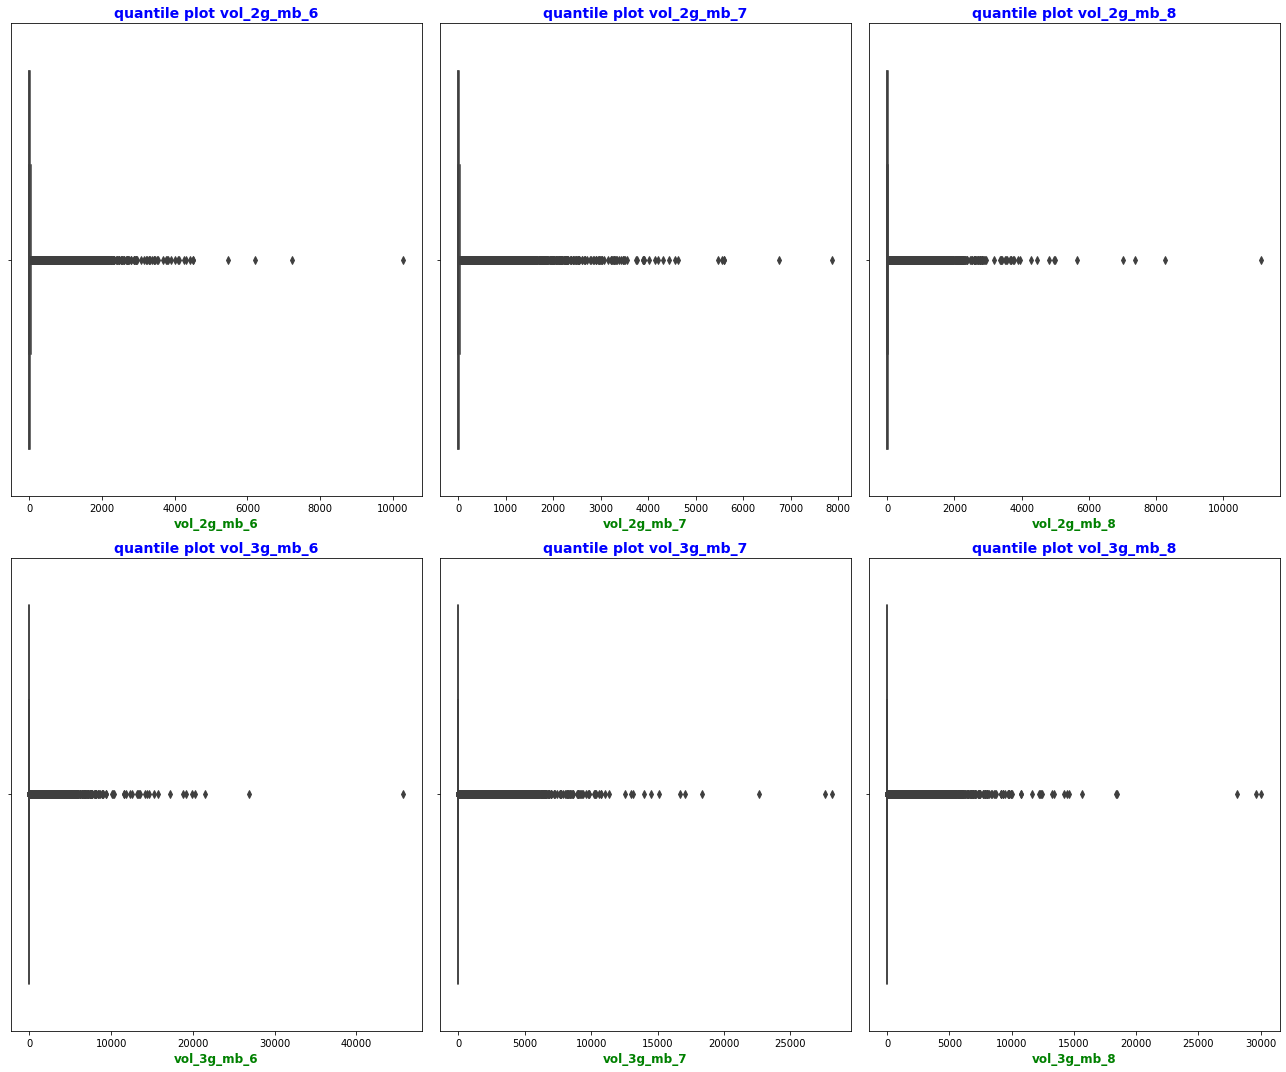

In [57]:
## internet usage box plot for outliers detection
internet_usage=telecom_filtered.filter(like='vol').columns
##print(len(telecom_filtered.filter(like='vol').columns))
plt.figure(figsize=(18,15))
for i in enumerate(internet_usage):
        plt.subplot(2,3,i[0]+1)
        plt.title('quantile plot'+' '+ i[1],fontweight='bold',color='b',size=14)
        plt.xlabel(i[1],fontweight='bold',color='g',size=12)
        sns.boxplot((telecom_filtered[i[1]]))
        
plt.tight_layout() #auto matically adjust subplots into figure area

plt.show()

In [58]:
telecom_filtered[internet_usage].describe()

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,78.859009,78.171382,69.209105,258.392681,278.093737,269.864111
std,277.445058,280.331857,268.494284,866.195376,855.682340,859.299266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14.450000,14.960000,9.620000,0.000000,2.080000,0.000000
max,10285.900000,7873.550000,11117.610000,45735.400000,28144.120000,30036.060000


### inference
- there is a high percenatge of data usage
- huge jump from 75% to max usage

### recharge columns


In [59]:
telecom_filtered.filter(like='rech').columns

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],
      dtype='object')

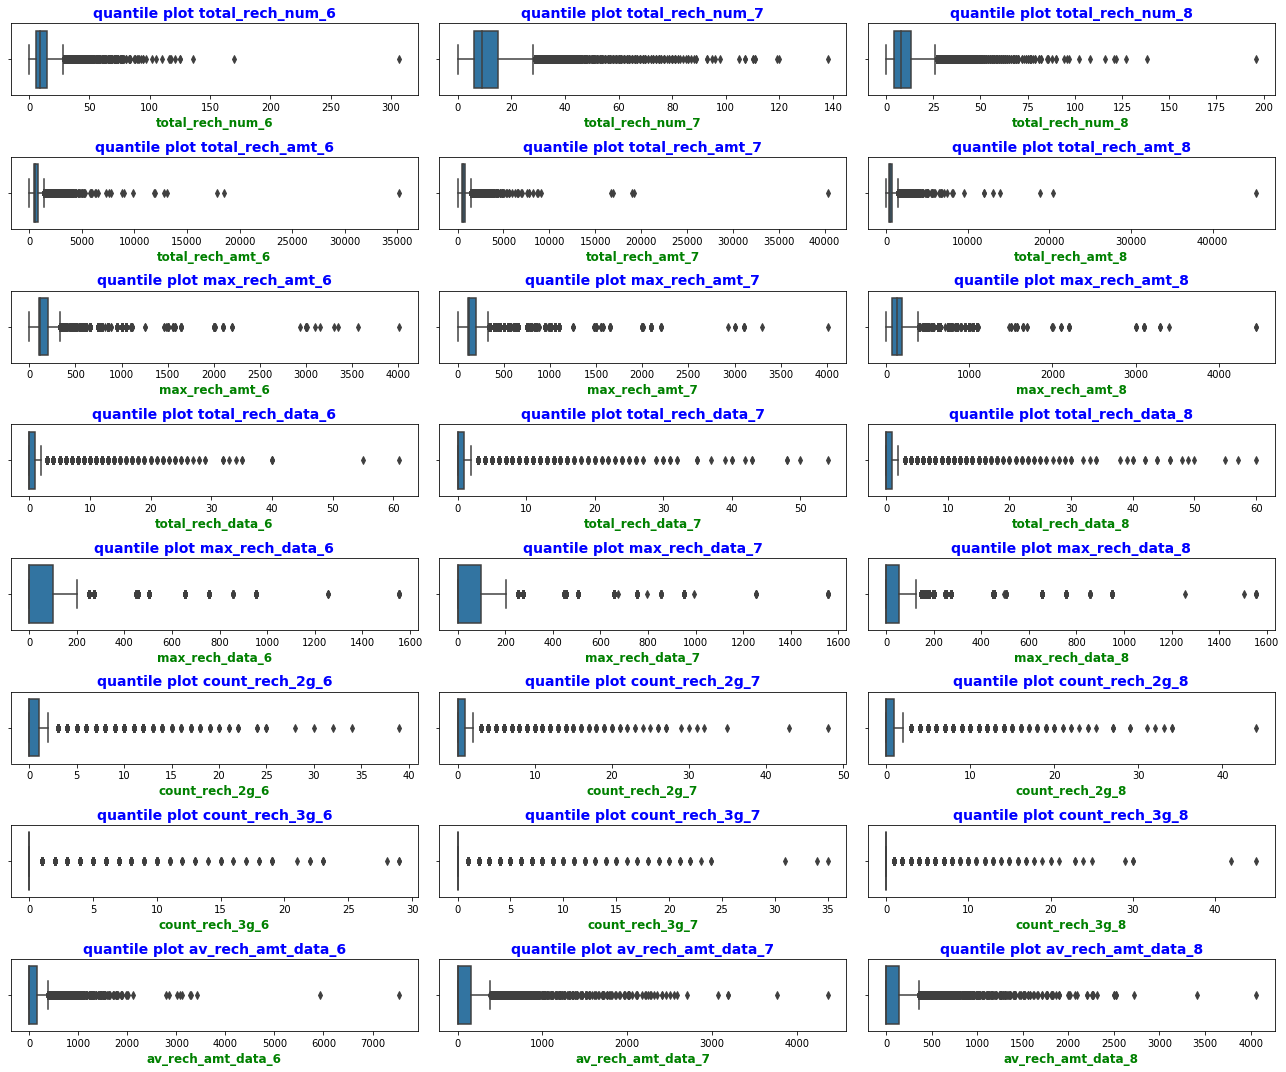

In [60]:
## recharge columns box plot for outliers detection
recharge_cols=telecom_filtered.filter(like='rech').columns
##print(len(recharge_cols))
plt.figure(figsize=(18,15))
for i in enumerate(recharge_cols):
        plt.subplot(8,3,i[0]+1)
        plt.title('quantile plot'+' '+ i[1],fontweight='bold',color='b',size=14)
        plt.xlabel(i[1],fontweight='bold',color='g',size=12)
        sns.boxplot((telecom_filtered[i[1]]))
        
plt.tight_layout() #auto matically adjust subplots into figure area

plt.show()

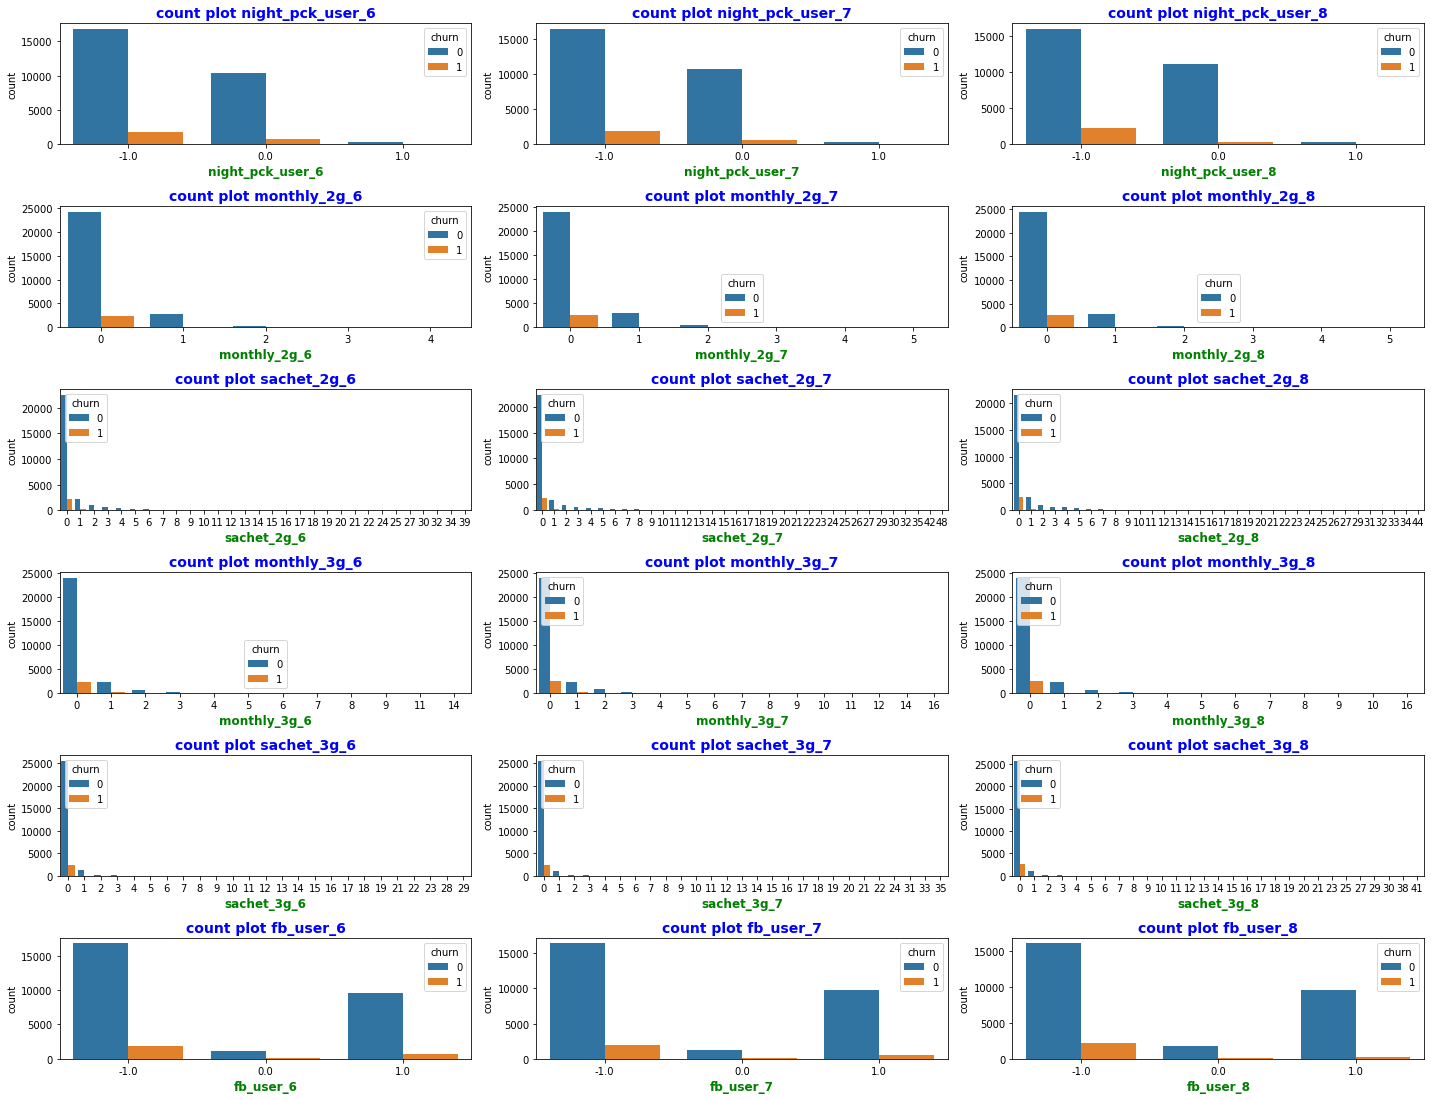

In [61]:
## categorical columns count  plot for outliers detection

##print(len(recharge_cols))
plt.figure(figsize=(20,20))
for i in enumerate(final_categorical_col):
        plt.subplot(8,3,i[0]+1)
        plt.title('count plot'+' '+ i[1],fontweight='bold',color='b',size=14)
        plt.xlabel(i[1],fontweight='bold',color='g',size=12)
        sns.countplot(x=telecom_filtered[i[1]], hue = telecom_filtered.churn)
        
plt.tight_layout() #auto matically adjust subplots into figure area

plt.show()



## Inference
- line plots with hue of churn shows class imbalance

24


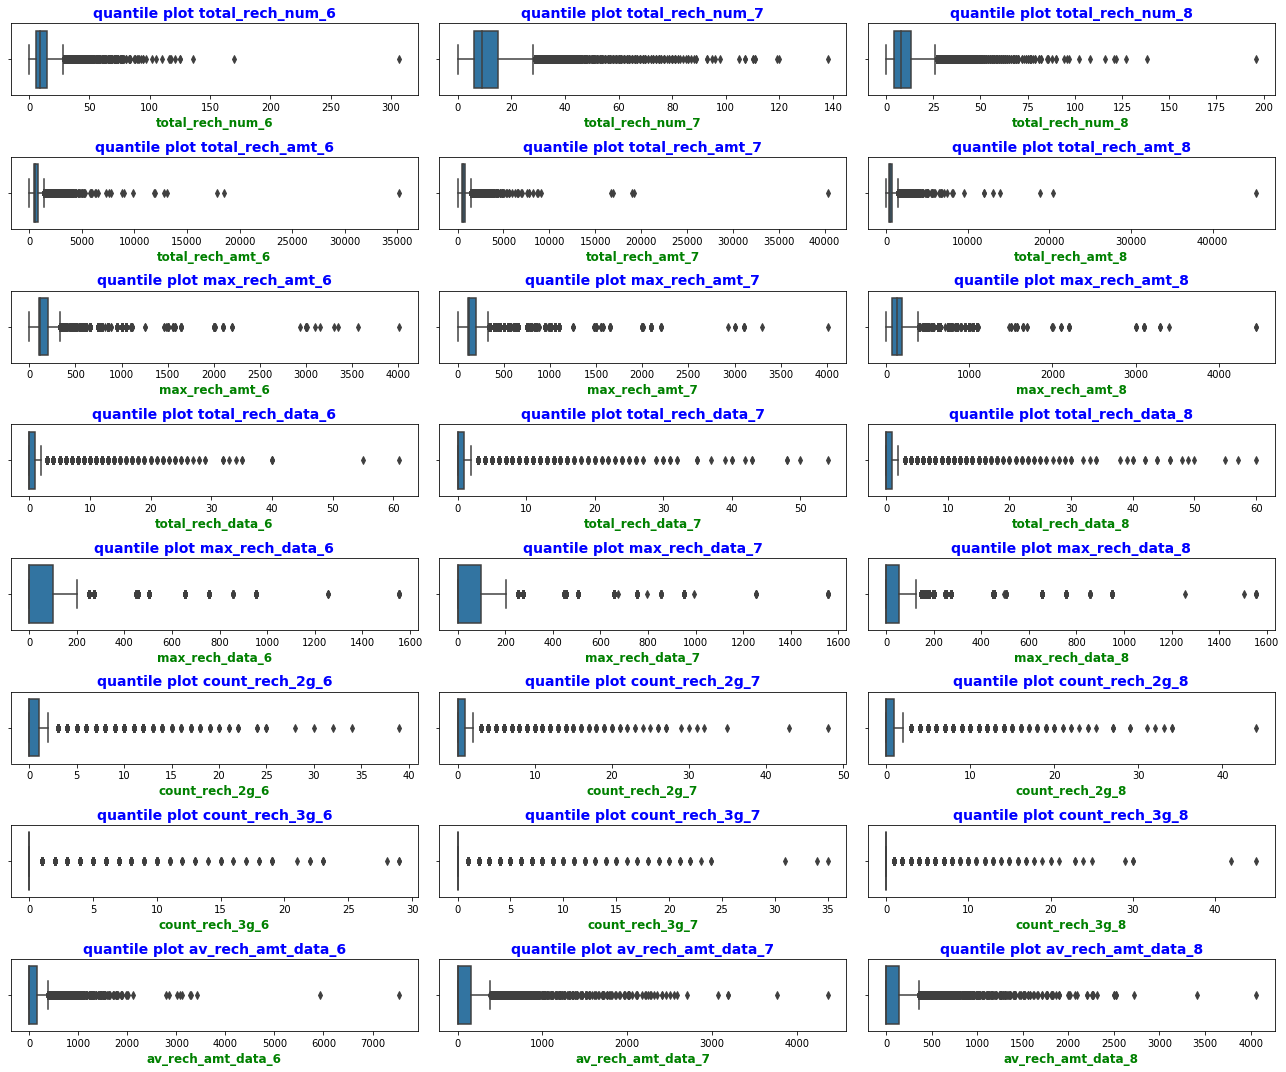

In [62]:
## recharge columns box plot for outliers detection
recharge_cols=telecom_filtered.filter(like='rech').columns
print(len(recharge_cols))
plt.figure(figsize=(18,15))
for i in enumerate(recharge_cols):
        plt.subplot(8,3,i[0]+1)
        plt.title('quantile plot'+' '+ i[1],fontweight='bold',color='b',size=14)
        plt.xlabel(i[1],fontweight='bold',color='g',size=12)
        sns.boxplot(telecom_filtered[i[1]])
        
plt.tight_layout() #auto matically adjust subplots into figure area

plt.show()

In [63]:
final_categorical_col


['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

### Encoding  categorical techniques

In [64]:
## creating dummy variables for categorical data

## new dummy variables created and dropping the first column
telecom_filtered=pd.get_dummies(data=telecom_filtered,columns=final_categorical_col,drop_first=True)
telecom_filtered.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_6_3,monthly_2g_6_4,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_7_3,monthly_2g_7_4,monthly_2g_7_5,monthly_2g_8_1,monthly_2g_8_2,monthly_2g_8_3,monthly_2g_8_4,monthly_2g_8_5,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_2g_6_5,sachet_2g_6_6,sachet_2g_6_7,sachet_2g_6_8,sachet_2g_6_9,sachet_2g_6_10,sachet_2g_6_11,sachet_2g_6_12,sachet_2g_6_13,sachet_2g_6_14,sachet_2g_6_15,sachet_2g_6_16,sachet_2g_6_17,sachet_2g_6_18,sachet_2g_6_19,sachet_2g_6_20,sachet_2g_6_21,sachet_2g_6_22,sachet_2g_6_24,sachet_2g_6_25,sachet_2g_6_27,sachet_2g_6_30,sachet_2g_6_32,sachet_2g_6_34,sachet_2g_6_39,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_2g_7_6,sachet_2g_7_7,sachet_2g_7_8,sachet_2g_7_9,sachet_2g_7_10,sachet_2g_7_11,sachet_2g_7_12,sachet_2g_7_13,sachet_2g_7_14,sachet_2g_7_15,sachet_2g_7_16,sachet_2g_7_17,sachet_2g_7_18,sachet_2g_7_19,sachet_2g_7_20,sachet_2g_7_21,sachet_2g_7_22,sachet_2g_7_23,sachet_2g_7_24,sachet_2g_7_25,sachet_2g_7_26,sachet_2g_7_27,sachet_2g_7_29,sachet_2g_7_30,sachet_2g_7_32,sachet_2g_7_35,sachet_2g_7_42,sachet_2g_7_48,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_8_6,sachet_2g_8_7,sachet_2g_8_8,sachet_2g_8_9,sachet_2g_8_10,sachet_2g_8_11,sachet_2g_8_12,sachet_2g_8_13,sachet_2g_8_14,sachet_2g_8_15,sachet_2g_8_16,sachet_2g_8_17,sachet_2g_8_18,sachet_2g_8_19,sachet_2g_8_20,sachet_2g_8_21,sachet_2g_8_22,sachet_2g_8_23,sachet_2g_8_24,sachet_2g_8_25,sachet_2g_8_26,sachet_2g_8_27,sachet_2g_8_29,sachet_2g_8_31,sachet_2g_8_32,sachet_2g_8_33,sachet_2g_8_34,sachet_2g_8_44,monthly_3g_6_1,monthly_3g_6_2,monthly_3g_6_3,monthly_3g_6_4,monthly_3g_6_5,monthly_3g_6_6,monthly_3g_6_7,monthly_3g_6_8,monthly_3g_6_9,monthly_3g_6_11,monthly_3g_6_14,monthly_3g_7_1,monthly_3g_7_2,monthly_3g_7_3,monthly_3g_7_4,monthly_3g_7_5,monthly_3g_7_6,monthly_3g_7_7,monthly_3g_7_8,monthly_3g_7_9,monthly_3g_7_10,monthly_3g_7_11,monthly_3g_7_12,monthly_3g_7_14,monthly_

### Deriving new features 
- to bring better understanding if data
- we take few columns and see the differencce month on month and see if it shows some indication on churn
- take mean of numerical columns of month 6 and 7 and and see if its greater than value of corresponding colmns in th month
- if the mean value is greater than 8th month, then it is indication of possiblity of churn and will serve better for model prediction.


In [65]:
##taking incomeing columns for derieving new features
telecom_filtered.filter(like ='mou_6').columns

Index(['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6',
       'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6',
       'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6',
       'spl_og_mou_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6',
       'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6',
       'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6',
       'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6'],
      dtype='object')

In [66]:
list(telecom_filtered.filter(like ='_6').columns)

['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'night_pck_user_6_0.0',
 'night_pck_user_6_1.0',
 'monthly_2g_6_1',
 'monthly_2g_6_2',
 'monthly_2g_6_3',
 'monthly_2g_6_4',
 'sachet_2g_6_1',
 'sachet_2g_6_2',
 'sachet_2g_6_3',
 'sachet_2g_6_4',
 'sachet_2g_6_5',
 'sa

In [67]:
telecom_filtered['onnet_mou_7_6_diff'] = telecom_filtered['onnet_mou_7'] - telecom_filtered['onnet_mou_6']
telecom_filtered['offnet_mou_7_6_diff'] = telecom_filtered['offnet_mou_7'] - telecom_filtered['offnet_mou_6']
telecom_filtered['roam_ic_mou_7_6_diff'] = telecom_filtered['roam_ic_mou_7'] - telecom_filtered['roam_ic_mou_6']
telecom_filtered['roam_og_mou_7_6_diff'] = telecom_filtered['roam_og_mou_7'] - telecom_filtered['roam_og_mou_6']
telecom_filtered['loc_og_t2t_mou_diff6'] = telecom_filtered['loc_og_t2t_mou_7'] - telecom_filtered['loc_og_t2t_mou_6']
telecom_filtered['loc_og_t2m_mou_7_6_diff'] = telecom_filtered['loc_og_t2m_mou_7'] - telecom_filtered['loc_og_t2m_mou_6']
telecom_filtered['loc_og_t2f_mou_7_6_diff'] = telecom_filtered['loc_og_t2f_mou_7'] - telecom_filtered['loc_og_t2f_mou_6']
telecom_filtered['loc_og_t2c_mou_7_6_diff'] = telecom_filtered['loc_og_t2c_mou_7'] - telecom_filtered['loc_og_t2c_mou_6']
telecom_filtered['loc_og_mou_7_6_diff'] = telecom_filtered['loc_og_mou_7'] - telecom_filtered['loc_og_mou_6']
telecom_filtered['std_og_t2t_mou_7_6_diff'] = telecom_filtered['std_og_t2t_mou_7'] - telecom_filtered['std_og_t2t_mou_6']
telecom_filtered['std_og_t2m_mou_7_6_diff'] = telecom_filtered['std_og_t2m_mou_7'] - telecom_filtered['std_og_t2m_mou_6']
telecom_filtered['std_og_t2f_mou_7_6_diff'] = telecom_filtered['std_og_t2f_mou_7'] - telecom_filtered['std_og_t2f_mou_6']
telecom_filtered['std_og_mou_7_6_diff'] = telecom_filtered['std_og_mou_7'] - telecom_filtered['std_og_mou_6']
telecom_filtered['isd_og_mou_7_6_diff'] = telecom_filtered['isd_og_mou_7'] - telecom_filtered['isd_og_mou_6']
telecom_filtered['spl_og_mou_7_6_diff'] = telecom_filtered['spl_og_mou_7'] - telecom_filtered['spl_og_mou_6']
telecom_filtered['total_og_mou_7_6_diff'] = telecom_filtered['total_og_mou_7'] - telecom_filtered['total_og_mou_6']
telecom_filtered['loc_ic_t2t_mou_7_6_diff'] = telecom_filtered['loc_ic_t2t_mou_7'] - telecom_filtered['loc_ic_t2t_mou_6']
telecom_filtered['loc_ic_t2m_mou_7_6_diff'] = telecom_filtered['loc_ic_t2m_mou_7'] - telecom_filtered['loc_ic_t2m_mou_6']
telecom_filtered['loc_ic_t2f_mou_7_6_diff'] = telecom_filtered['loc_ic_t2f_mou_7'] - telecom_filtered['loc_ic_t2f_mou_6']
telecom_filtered['loc_ic_mou_7_6_diff'] = telecom_filtered['loc_ic_mou_7'] - telecom_filtered['loc_ic_mou_6']
telecom_filtered['std_ic_t2t_mou_7_6_diff'] = telecom_filtered['std_ic_t2t_mou_7'] - telecom_filtered['std_ic_t2t_mou_6']
telecom_filtered['std_ic_t2m_mou_7_6_diff'] = telecom_filtered['std_ic_t2m_mou_7'] - telecom_filtered['std_ic_t2m_mou_6']
telecom_filtered['std_ic_t2f_mou_7_6_diff'] = telecom_filtered['std_ic_t2f_mou_7'] - telecom_filtered['std_ic_t2f_mou_6']
telecom_filtered['std_ic_mou_7_6_diff'] = telecom_filtered['std_ic_mou_7'] - telecom_filtered['std_ic_mou_6']
telecom_filtered['total_ic_mou_7_6_diff'] = telecom_filtered['total_ic_mou_7'] - telecom_filtered['total_ic_mou_6']
telecom_filtered['spl_ic_mou_7_6_diff'] = telecom_filtered['spl_ic_mou_7'] - telecom_filtered['spl_ic_mou_6']
telecom_filtered['isd_ic_mou_7_6_diff'] = telecom_filtered['isd_ic_mou_7'] - telecom_filtered['isd_ic_mou_6']

telecom_filtered['onnet_mou_8_7_diff'] = telecom_filtered['onnet_mou_8'] - telecom_filtered['onnet_mou_7']
telecom_filtered['offnet_mou_8_7_diff'] = telecom_filtered['offnet_mou_8'] - telecom_filtered['offnet_mou_7']
telecom_filtered['roam_ic_mou_8_7_diff'] = telecom_filtered['roam_ic_mou_8'] - telecom_filtered['roam_ic_mou_7']
telecom_filtered['roam_og_mou_8_7_diff'] = telecom_filtered['roam_og_mou_8'] - telecom_filtered['roam_og_mou_7']
telecom_filtered['loc_og_t2t_mou_diff6'] = telecom_filtered['loc_og_t2t_mou_8'] - telecom_filtered['loc_og_t2t_mou_7']
telecom_filtered['loc_og_t2m_mou_8_7_diff'] = telecom_filtered['loc_og_t2m_mou_8'] - telecom_filtered['loc_og_t2m_mou_7']
telecom_filtered['loc_og_t2f_mou_8_7_diff'] = telecom_filtered['loc_og_t2f_mou_8'] - telecom_filtered['loc_og_t2f_mou_7']
telecom_filtered['loc_og_t2c_mou_8_7_diff'] = telecom_filtered['loc_og_t2c_mou_8'] - telecom_filtered['loc_og_t2c_mou_7']
telecom_filtered['loc_og_mou_8_7_diff'] = telecom_filtered['loc_og_mou_8'] - telecom_filtered['loc_og_mou_7']
telecom_filtered['std_og_t2t_mou_8_7_diff'] = telecom_filtered['std_og_t2t_mou_8'] - telecom_filtered['std_og_t2t_mou_7']
telecom_filtered['std_og_t2m_mou_8_7_diff'] = telecom_filtered['std_og_t2m_mou_8'] - telecom_filtered['std_og_t2m_mou_7']
telecom_filtered['std_og_t2f_mou_8_7_diff'] = telecom_filtered['std_og_t2f_mou_8'] - telecom_filtered['std_og_t2f_mou_7']
telecom_filtered['std_og_mou_8_7_diff'] = telecom_filtered['std_og_mou_8'] - telecom_filtered['std_og_mou_7']
telecom_filtered['isd_og_mou_8_7_diff'] = telecom_filtered['isd_og_mou_8'] - telecom_filtered['isd_og_mou_7']
telecom_filtered['spl_og_mou_8_7_diff'] = telecom_filtered['spl_og_mou_8'] - telecom_filtered['spl_og_mou_7']
telecom_filtered['total_og_mou_8_7_diff'] = telecom_filtered['total_og_mou_8'] - telecom_filtered['total_og_mou_7']
telecom_filtered['loc_ic_t2t_mou_8_7_diff'] = telecom_filtered['loc_ic_t2t_mou_8'] - telecom_filtered['loc_ic_t2t_mou_7']
telecom_filtered['loc_ic_t2m_mou_8_7_diff'] = telecom_filtered['loc_ic_t2m_mou_8'] - telecom_filtered['loc_ic_t2m_mou_7']
telecom_filtered['loc_ic_t2f_mou_8_7_diff'] = telecom_filtered['loc_ic_t2f_mou_8'] - telecom_filtered['loc_ic_t2f_mou_7']
telecom_filtered['loc_ic_mou_8_7_diff'] = telecom_filtered['loc_ic_mou_8'] - telecom_filtered['loc_ic_mou_7']
telecom_filtered['std_ic_t2t_mou_8_7_diff'] = telecom_filtered['std_ic_t2t_mou_8'] - telecom_filtered['std_ic_t2t_mou_7']
telecom_filtered['std_ic_t2m_mou_8_7_diff'] = telecom_filtered['std_ic_t2m_mou_8'] - telecom_filtered['std_ic_t2m_mou_7']
telecom_filtered['std_ic_t2f_mou_8_7_diff'] = telecom_filtered['std_ic_t2f_mou_8'] - telecom_filtered['std_ic_t2f_mou_7']
telecom_filtered['std_ic_mou_8_7_diff'] = telecom_filtered['std_ic_mou_8'] - telecom_filtered['std_ic_mou_7']
telecom_filtered['total_ic_mou_8_7_diff'] = telecom_filtered['total_ic_mou_8'] - telecom_filtered['total_ic_mou_7']
telecom_filtered['spl_ic_mou_8_7_diff'] = telecom_filtered['spl_ic_mou_8'] - telecom_filtered['spl_ic_mou_7']
telecom_filtered['isd_ic_mou_8_7_diff'] = telecom_filtered['isd_ic_mou_8'] - telecom_filtered['isd_ic_mou_7']

In [68]:
list(telecom_filtered.columns)

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [69]:
## lsit of columns other than mou
['arpu_6',
 'arpu_7',
 'arpu_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'aon',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'churn']

['arpu_6',
 'arpu_7',
 'arpu_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'aon',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'churn']

### Create new features based on june and july month average and derive a variable comparing it with 8th month
- if 8th month value > avg of 6 and 7th month then set new variable as 1 else 0

In [70]:
telecom_filtered['arpu_6_7_avg'] = telecom_filtered[['arpu_6','arpu_7']].mean(axis=1)
telecom_filtered['arpu_flag'] = np.where((telecom_filtered['arpu_8'] > telecom_filtered['arpu_6_7_avg']), 1, 0)

telecom_filtered['og_others_6_7_avg'] = telecom_filtered[['og_others_6','og_others_7']].mean(axis=1)
telecom_filtered['og_others_flag'] = np.where((telecom_filtered['og_others_8'] > telecom_filtered['og_others_6_7_avg']), 1, 0)

telecom_filtered['ic_others_6_7_avg'] = telecom_filtered[['ic_others_6','ic_others_7']].mean(axis=1)
telecom_filtered['ic_others_flag'] = np.where((telecom_filtered['ic_others_8'] > telecom_filtered['ic_others_6_7_avg']), 1, 0)

telecom_filtered['total_rech_num_6_7_avg'] = telecom_filtered[['total_rech_num_6','total_rech_num_7']].mean(axis=1)
telecom_filtered['total_rech_num_flag'] = np.where((telecom_filtered['total_rech_num_8'] > telecom_filtered['total_rech_num_6_7_avg']), 1, 0)

telecom_filtered['total_rech_amt_6_7_avg'] = telecom_filtered[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)
telecom_filtered['total_rech_amt_flag'] = np.where((telecom_filtered['total_rech_amt_8'] > telecom_filtered['total_rech_amt_6_7_avg']), 1, 0)

telecom_filtered['max_rech_data_6_7_avg'] = telecom_filtered[['max_rech_data_6','max_rech_data_7']].mean(axis=1)
telecom_filtered['max_rech_data_flag'] = np.where((telecom_filtered['max_rech_data_8'] > telecom_filtered['max_rech_data_6_7_avg']), 1, 0)

telecom_filtered['last_day_rch_amt_6_7_avg'] = telecom_filtered[['last_day_rch_amt_6','last_day_rch_amt_7']].mean(axis=1)
telecom_filtered['last_day_rch_amt_flag'] = np.where((telecom_filtered['last_day_rch_amt_8'] > telecom_filtered['last_day_rch_amt_6_7_avg']), 1, 0)

telecom_filtered['total_rech_data_6_7_avg'] = telecom_filtered[['total_rech_data_6','total_rech_data_7']].mean(axis=1)
telecom_filtered['total_rech_data_flag'] = np.where((telecom_filtered['total_rech_data_8'] > telecom_filtered['total_rech_data_6_7_avg']), 1, 0)

telecom_filtered['max_rech_data_6_7_avg'] = telecom_filtered[['max_rech_data_6','max_rech_data_7']].mean(axis=1)
telecom_filtered['max_rech_data_flag'] = np.where((telecom_filtered['max_rech_data_8'] > telecom_filtered['max_rech_data_6_7_avg']), 1, 0)

telecom_filtered['count_rech_2g_6_7_avg'] = telecom_filtered[['count_rech_2g_6','count_rech_2g_7']].mean(axis=1)
telecom_filtered['count_rech_2g_flag'] = np.where((telecom_filtered['count_rech_2g_8'] > telecom_filtered['count_rech_2g_6_7_avg']), 1, 0)

telecom_filtered['count_rech_3g_6_7_avg'] = telecom_filtered[['count_rech_3g_6','count_rech_3g_7']].mean(axis=1)
telecom_filtered['count_rech_3g_flag'] = np.where((telecom_filtered['count_rech_3g_8'] > telecom_filtered['count_rech_3g_6_7_avg']), 1, 0)

telecom_filtered['av_rech_amt_data_6_7_avg'] = telecom_filtered[['av_rech_amt_data_6','av_rech_amt_data_7']].mean(axis=1)
telecom_filtered['av_rech_amt_data_flag'] = np.where((telecom_filtered['av_rech_amt_data_8'] > telecom_filtered['av_rech_amt_data_6_7_avg']), 1, 0)

telecom_filtered['vol_2g_mb_6_7_avg'] = telecom_filtered[['vol_2g_mb_6','vol_2g_mb_7']].mean(axis=1)
telecom_filtered['vol_2g_mb_flag'] = np.where((telecom_filtered['vol_2g_mb_8'] > telecom_filtered['vol_2g_mb_6_7_avg']), 1, 0)

telecom_filtered['vol_3g_mb_6_7_avg'] = telecom_filtered[['vol_3g_mb_6','vol_3g_mb_7']].mean(axis=1)
telecom_filtered['vol_3g_mb_flag'] = np.where((telecom_filtered['vol_3g_mb_8'] > telecom_filtered['vol_3g_mb_6_7_avg']), 1, 0)

telecom_filtered['vbc_6_7_avg'] = telecom_filtered[['jun_vbc_3g','jul_vbc_3g']].mean(axis=1)
telecom_filtered['vbc_flag'] = np.where((telecom_filtered['aug_vbc_3g'] > telecom_filtered['vbc_6_7_avg']), 1, 0)



In [71]:
## checking the df
telecom_filtered.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_6_3,monthly_2g_6_4,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_7_3,monthly_2g_7_4,monthly_2g_7_5,monthly_2g_8_1,monthly_2g_8_2,monthly_2g_8_3,monthly_2g_8_4,monthly_2g_8_5,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_2g_6_5,sachet_2g_6_6,sachet_2g_6_7,sachet_2g_6_8,sachet_2g_6_9,sachet_2g_6_10,sachet_2g_6_11,sachet_2g_6_12,sachet_2g_6_13,sachet_2g_6_14,sachet_2g_6_15,sachet_2g_6_16,sachet_2g_6_17,sachet_2g_6_18,sachet_2g_6_19,sachet_2g_6_20,sachet_2g_6_21,sachet_2g_6_22,sachet_2g_6_24,sachet_2g_6_25,sachet_2g_6_27,sachet_2g_6_30,sachet_2g_6_32,sachet_2g_6_34,sachet_2g_6_39,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_2g_7_6,sachet_2g_7_7,sachet_2g_7_8,sachet_2g_7_9,sachet_2g_7_10,sachet_2g_7_11,sachet_2g_7_12,sachet_2g_7_13,sachet_2g_7_14,sachet_2g_7_15,sachet_2g_7_16,sachet_2g_7_17,sachet_2g_7_18,sachet_2g_7_19,sachet_2g_7_20,sachet_2g_7_21,sachet_2g_7_22,sachet_2g_7_23,sachet_2g_7_24,sachet_2g_7_25,sachet_2g_7_26,sachet_2g_7_27,sachet_2g_7_29,sachet_2g_7_30,sachet_2g_7_32,sachet_2g_7_35,sachet_2g_7_42,sachet_2g_7_48,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_8_6,sachet_2g_8_7,sachet_2g_8_8,sachet_2g_8_9,sachet_2g_8_10,sachet_2g_8_11,sachet_2g_8_12,sachet_2g_8_13,sachet_2g_8_14,sachet_2g_8_15,sachet_2g_8_16,sachet_2g_8_17,sachet_2g_8_18,sachet_2g_8_19,sachet_2g_8_20,sachet_2g_8_21,sachet_2g_8_22,sachet_2g_8_23,sachet_2g_8_24,sachet_2g_8_25,sachet_2g_8_26,sachet_2g_8_27,sachet_2g_8_29,sachet_2g_8_31,sachet_2g_8_32,sachet_2g_8_33,sachet_2g_8_34,sachet_2g_8_44,monthly_3g_6_1,monthly_3g_6_2,monthly_3g_6_3,monthly_3g_6_4,monthly_3g_6_5,monthly_3g_6_6,monthly_3g_6_7,monthly_3g_6_8,monthly_3g_6_9,monthly_3g_6_11,monthly_3g_6_14,monthly_3g_7_1,monthly_3g_7_2,monthly_3g_7_3,monthly_3g_7_4,monthly_3g_7_5,monthly_3g_7_6,monthly_3g_7_7,monthly_3g_7_8,monthly_3g_7_9,monthly_3g_7_10,monthly_3g_7_11,monthly_3g_7_12,monthly_3g_7_14,monthly_

In [72]:
## checking shape
telecom_filtered.shape

(30011, 444)

### Dropping 6 and 7 th month column as we have derived new column based on them

In [73]:
drop_6_7_cols=list(telecom.filter(regex = '6|7').columns)
## not dropping categorical cols                  
drop_6_7_cols.remove('night_pck_user_6')  
drop_6_7_cols.remove('night_pck_user_7')     
drop_6_7_cols.remove('sachet_2g_6')  
drop_6_7_cols.remove('sachet_2g_7')
drop_6_7_cols.remove('sachet_3g_6')  
drop_6_7_cols.remove('sachet_3g_7')
drop_6_7_cols.remove('fb_user_6')  
drop_6_7_cols.remove('fb_user_7')
drop_6_7_cols.remove('monthly_2g_6')  
drop_6_7_cols.remove('monthly_2g_7')                  
drop_6_7_cols.remove('monthly_3g_6')  
drop_6_7_cols.remove('monthly_3g_7')                  
drop_6_7_cols.remove('avg_rech_amt_6_7')
drop_6_7_cols

['arpu_6',
 'arpu_7',
 'onnet_mou_6',
 'onnet_mou_7',
 'offnet_mou_6',
 'offnet_mou_7',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_mou_6',
 'std_og_mou_7',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'og_others_6',
 'og_others_7',
 'total_og_mou_6',
 'total_og_mou_7',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'total_ic_mou_6',
 

In [74]:
## dropping all 6 and 7 numerical cols adn creating new data frame. 
telecom_filtered_churn=telecom_filtered.drop(drop_6_7_cols,axis=1)
telecom_filtered_churn.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_6_3,monthly_2g_6_4,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_7_3,monthly_2g_7_4,monthly_2g_7_5,monthly_2g_8_1,monthly_2g_8_2,monthly_2g_8_3,monthly_2g_8_4,monthly_2g_8_5,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_2g_6_5,sachet_2g_6_6,sachet_2g_6_7,sachet_2g_6_8,sachet_2g_6_9,sachet_2g_6_10,sachet_2g_6_11,sachet_2g_6_12,sachet_2g_6_13,sachet_2g_6_14,sachet_2g_6_15,sachet_2g_6_16,sachet_2g_6_17,sachet_2g_6_18,sachet_2g_6_19,sachet_2g_6_20,sachet_2g_6_21,sachet_2g_6_22,sachet_2g_6_24,sachet_2g_6_25,sachet_2g_6_27,sachet_2g_6_30,sachet_2g_6_32,sachet_2g_6_34,sachet_2g_6_39,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_2g_7_6,sachet_2g_7_7,sachet_2g_7_8,sachet_2g_7_9,sachet_2g_7_10,sachet_2g_7_11,sachet_2g_7_12,sachet_2g_7_13,sachet_2g_7_14,sachet_2g_7_15,sachet_2g_7_16,sachet_2g_7_17,sachet_2g_7_18,sachet_2g_7_19,sachet_2g_7_20,sachet_2g_7_21,sachet_2g_7_22,sachet_2g_7_23,sachet_2g_7_24,sachet_2g_7_25,sachet_2g_7_26,sachet_2g_7_27,sachet_2g_7_29,sachet_2g_7_30,sachet_2g_7_32,sachet_2g_7_35,sachet_2g_7_42,sachet_2g_7_48,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_8_6,sachet_2g_8_7,sachet_2g_8_8,sachet_2g_8_9,sachet_2g_8_10,sachet_2g_8_11,sachet_2g_8_12,sachet_2g_8_13,sachet_2g_8_14,sachet_2g_8_15,sachet_2g_8_16,sachet_2g_8_17,sachet_2g_8_18,sachet_2g_8_19,sachet_2g_8_20,sachet_2g_8_21,sachet_2g_8_22,sachet_2g_8_23,sachet_2g_8_24,sachet_2g_8_25,sachet_2g_8_26,sachet_2g_8_27,sachet_2g_8_29,sachet_2g_8_31,sachet_2g_8_32,sachet_2g_8_33,sachet_2g_8_34,sachet_2g_8_44,monthly_3g_6_1,monthly_3g_6_2,monthly_3g_6_3,monthly_3g_6_4,monthly_3g_6_5,monthly_3g_6_6,monthly_3g_6_7,monthly_3g_6_8,monthly_3g_6_9,monthly_3g_6_11,monthly_3g_6_14,monthly_3g_7_1,monthly_3g_7_2,monthly_3g_7_3,monthly_3g_7_4,monthly_3g_7_5,monthly_3g_7_6,monthly_3g_7_7,monthly_3g_7_8,monthly_3g_7_9,monthly_3g_7_10,monthly_3g_7_11,monthly_3g_7_12,monthly_3g_7_14,monthly_3g_7_16,monthly_3g_8_1,monthly_3g_8_2,monthly_3g_8_3,monthly_3g_8_4,monthly_3g_8_5,monthly_3g_8_6,monthly_3g_8_7,monthly_3g_8_8,monthly_3g_8_9,monthly_3g_8_10,monthly_3g_8_16,sachet_3g_6_1,sachet_3g_6_2,sachet_3g_6_3,sachet_3g_6_4,sachet_3g_6_5,sachet_3g_6_6,sachet_3g_6_7,sachet_3g_6_8,sachet_3g_6_9,sachet_3g_6_10,sachet_3g_6_11,sachet_3g_6_12,sachet_3g_6_13,sachet_3g_6_14,sachet_3g_6_15,sachet_3g_6_16,sachet_3g_6_17,sachet_3g_6_18,sachet_3g_6_19,sachet_3g_6_21,sachet_3g_6_22,sachet_3g_6_23,sachet_3g_6_28,sachet_3g_6_29,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_7_3,sachet_3g_7_4,sachet_3g_7_5,sachet_3g_7_6,sachet_3g_7_7,sachet_3g_7_8,sachet_3g_7_9,sachet_3g_7_10,sachet_3g_7_11,sachet_3g_7_12,sachet_3g_7_13,sachet_3g_7_14,sachet_3g_7_15,sachet_3g_7_16,sachet_3g_7_17,sachet_3g_7_18,sachet_3g_7_19,sachet_3g_7_20,sachet_3g_7_21,sachet_3g_7_22,sachet_3g_7_24,sachet_3g_7_31,sachet_3g_7_33,sachet_3g_7_35,sachet_3g_8_1,sachet_3g_8_2,sachet_3g_8_3,sachet_3g_8_4,sachet_3g_8_5,sachet_3g_8_6,sachet_3g_8_7,sachet_3g_8_8,sachet_3g_8_9,sachet_3g_8_10,sachet_3g_8_11,sachet_3g_8_12,sachet_3g_8_13,sachet_3g_8_14,sachet_3g_8_15,sachet_3g_8_16,sachet_3g_8_17,sachet_3g_8_18,sachet_3g_8_19,sachet_3g_8_20,sachet_3g_8_21,sachet_3g_8_23,sach

In [75]:
telecom_filtered_churn.shape

(30011, 362)

### Checking correlation to drop highly correlated columns

In [76]:
corr_mat = telecom_filtered_churn.corr()
abs_corr_mat = corr_mat.abs()
#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1
abs_corr_mat = abs_corr_mat.where(np.triu(np.ones(abs_corr_mat.shape), k=1).astype(np.bool))
high_corre_index = np.where(abs_corr_mat > 0.80)
correlated_pairs = [(abs_corr_mat.index[x], abs_corr_mat.columns[y]) 
                     for x,y in zip(*high_corre_index) if x!=y and x < y]

print("Total Correlated features : ", len(correlated_pairs))
correlated_pairs

Total Correlated features :  39


[('arpu_8', 'total_rech_amt_8'),
 ('onnet_mou_8', 'std_og_t2t_mou_8'),
 ('offnet_mou_8', 'std_og_t2m_mou_8'),
 ('std_og_mou_8', 'total_og_mou_8'),
 ('loc_ic_t2m_mou_8', 'loc_ic_mou_8'),
 ('loc_ic_mou_8', 'total_ic_mou_8'),
 ('std_ic_t2m_mou_8', 'std_ic_mou_8'),
 ('total_rech_data_8', 'count_rech_2g_8'),
 ('max_rech_data_8', 'av_rech_amt_data_8'),
 ('av_rech_amt_data_8', 'vol_3g_mb_8'),
 ('jul_vbc_3g', 'vbc_6_7_avg'),
 ('jun_vbc_3g', 'vbc_6_7_avg'),
 ('night_pck_user_6_0.0', 'fb_user_6_1.0'),
 ('night_pck_user_7_0.0', 'fb_user_7_1.0'),
 ('night_pck_user_8_0.0', 'fb_user_8_1.0'),
 ('sachet_2g_6_30', 'sachet_2g_8_31'),
 ('sachet_2g_6_30', 'sachet_3g_8_29'),
 ('sachet_2g_6_34', 'sachet_2g_7_42'),
 ('sachet_2g_6_39', 'sachet_2g_8_33'),
 ('sachet_2g_7_48', 'sachet_2g_8_23'),
 ('sachet_2g_8_26', 'sachet_3g_8_27'),
 ('sachet_2g_8_31', 'sachet_3g_8_29'),
 ('monthly_3g_7_10', 'monthly_3g_8_16'),
 ('sachet_3g_7_31', 'sachet_3g_8_30'),
 ('onnet_mou_7_6_diff', 'std_og_t2t_mou_7_6_diff'),
 ('offnet_

In [77]:
## getting cols to be dropped for corraltion >0.80
corr_matrix = telecom_filtered_churn.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
drop_corr_cols= [column for column in upper.columns if any(upper[column] > 0.80)]
drop_corr_cols

['std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'total_og_mou_8',
 'loc_ic_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'total_rech_amt_8',
 'count_rech_2g_8',
 'av_rech_amt_data_8',
 'vol_3g_mb_8',
 'sachet_2g_7_42',
 'sachet_2g_8_23',
 'sachet_2g_8_31',
 'sachet_2g_8_33',
 'monthly_3g_8_16',
 'sachet_3g_8_27',
 'sachet_3g_8_29',
 'sachet_3g_8_30',
 'fb_user_6_1.0',
 'fb_user_7_1.0',
 'fb_user_8_1.0',
 'std_og_t2t_mou_7_6_diff',
 'std_og_t2m_mou_7_6_diff',
 'total_og_mou_7_6_diff',
 'loc_ic_mou_7_6_diff',
 'std_ic_mou_7_6_diff',
 'total_ic_mou_7_6_diff',
 'std_og_t2t_mou_8_7_diff',
 'std_og_t2m_mou_8_7_diff',
 'total_og_mou_8_7_diff',
 'total_ic_mou_8_7_diff',
 'total_rech_amt_6_7_avg',
 'count_rech_2g_6_7_avg',
 'av_rech_amt_data_6_7_avg',
 'av_rech_amt_data_flag',
 'vol_3g_mb_6_7_avg',
 'vbc_6_7_avg']

In [78]:
## dropping corralated columns >0.80
telecom_filtered_churn.drop(drop_corr_cols,axis=1,inplace=True)
telecom_filtered_churn.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_3g_8,vol_2g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_6_3,monthly_2g_6_4,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_7_3,monthly_2g_7_4,monthly_2g_7_5,monthly_2g_8_1,monthly_2g_8_2,monthly_2g_8_3,monthly_2g_8_4,monthly_2g_8_5,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_2g_6_5,sachet_2g_6_6,sachet_2g_6_7,sachet_2g_6_8,sachet_2g_6_9,sachet_2g_6_10,sachet_2g_6_11,sachet_2g_6_12,sachet_2g_6_13,sachet_2g_6_14,sachet_2g_6_15,sachet_2g_6_16,sachet_2g_6_17,sachet_2g_6_18,sachet_2g_6_19,sachet_2g_6_20,sachet_2g_6_21,sachet_2g_6_22,sachet_2g_6_24,sachet_2g_6_25,sachet_2g_6_27,sachet_2g_6_30,sachet_2g_6_32,sachet_2g_6_34,sachet_2g_6_39,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_2g_7_6,sachet_2g_7_7,sachet_2g_7_8,sachet_2g_7_9,sachet_2g_7_10,sachet_2g_7_11,sachet_2g_7_12,sachet_2g_7_13,sachet_2g_7_14,sachet_2g_7_15,sachet_2g_7_16,sachet_2g_7_17,sachet_2g_7_18,sachet_2g_7_19,sachet_2g_7_20,sachet_2g_7_21,sachet_2g_7_22,sachet_2g_7_23,sachet_2g_7_24,sachet_2g_7_25,sachet_2g_7_26,sachet_2g_7_27,sachet_2g_7_29,sachet_2g_7_30,sachet_2g_7_32,sachet_2g_7_35,sachet_2g_7_48,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_8_6,sachet_2g_8_7,sachet_2g_8_8,sachet_2g_8_9,sachet_2g_8_10,sachet_2g_8_11,sachet_2g_8_12,sachet_2g_8_13,sachet_2g_8_14,sachet_2g_8_15,sachet_2g_8_16,sachet_2g_8_17,sachet_2g_8_18,sachet_2g_8_19,sachet_2g_8_20,sachet_2g_8_21,sachet_2g_8_22,sachet_2g_8_24,sachet_2g_8_25,sachet_2g_8_26,sachet_2g_8_27,sachet_2g_8_29,sachet_2g_8_32,sachet_2g_8_34,sachet_2g_8_44,monthly_3g_6_1,monthly_3g_6_2,monthly_3g_6_3,monthly_3g_6_4,monthly_3g_6_5,monthly_3g_6_6,monthly_3g_6_7,monthly_3g_6_8,monthly_3g_6_9,monthly_3g_6_11,monthly_3g_6_14,monthly_3g_7_1,monthly_3g_7_2,monthly_3g_7_3,monthly_3g_7_4,monthly_3g_7_5,monthly_3g_7_6,monthly_3g_7_7,monthly_3g_7_8,monthly_3g_7_9,monthly_3g_7_10,monthly_3g_7_11,monthly_3g_7_12,monthly_3g_7_14,monthly_3g_7_16,monthly_3g_8_1,monthly_3g_8_2,monthly_3g_8_3,monthly_3g_8_4,monthly_3g_8_5,monthly_3g_8_6,monthly_3g_8_7,monthly_3g_8_8,monthly_3g_8_9,monthly_3g_8_10,sachet_3g_6_1,sachet_3g_6_2,sachet_3g_6_3,sachet_3g_6_4,sachet_3g_6_5,sachet_3g_6_6,sachet_3g_6_7,sachet_3g_6_8,sachet_3g_6_9,sachet_3g_6_10,sachet_3g_6_11,sachet_3g_6_12,sachet_3g_6_13,sachet_3g_6_14,sachet_3g_6_15,sachet_3g_6_16,sachet_3g_6_17,sachet_3g_6_18,sachet_3g_6_19,sachet_3g_6_21,sachet_3g_6_22,sachet_3g_6_23,sachet_3g_6_28,sachet_3g_6_29,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_7_3,sachet_3g_7_4,sachet_3g_7_5,sachet_3g_7_6,sachet_3g_7_7,sachet_3g_7_8,sachet_3g_7_9,sachet_3g_7_10,sachet_3g_7_11,sachet_3g_7_12,sachet_3g_7_13,sachet_3g_7_14,sachet_3g_7_15,sachet_3g_7_16,sachet_3g_7_17,sachet_3g_7_18,sachet_3g_7_19,sachet_3g_7_20,sachet_3g_7_21,sachet_3g_7_22,sachet_3g_7_24,sachet_3g_7_31,sachet_3g_7_33,sachet_3g_7_35,sachet_3g_8_1,sachet_3g_8_2,sachet_3g_8_3,sachet_3g_8_4,sachet_3g_8_5,sachet_3g_8_6,sachet_3g_8_7,sachet_3g_8_8,sachet_3g_8_9,sachet_3g_8_10,sachet_3g_8_11,sachet_3g_8_12,sachet_3g_8_13,sachet_3g_8_14,sachet_3g_8_15,sachet_3g_8_16,sachet_3g_8_17,sachet_3g_8_18,sachet_3g_8_19,sachet_3g_8_20,sachet_3g_8_21,sachet_3g_8_23,sachet_3g_8_25,sachet_3g_8_38,sachet_3g_8_41,fb_user_6_0.0,fb_user_7_0.0,fb_user_8_0.0,onnet_mou_7_6_diff,offnet_mou_7_6_diff,roam_ic_mou_7_6_diff,roam_og_mou_7_6_diff,loc_og_t2t_mou_diff6,loc_og_t2m_mou_7_6_diff,loc_og_t2f_mou_7_6_di

In [79]:
## shape after dropping corralted cols
telecom_filtered_churn.shape

(30011, 325)

### Oulier treatment for numerical colums

In [80]:
## below are original categorical colums for which duummy variables were created, need to remove them dataframe columns
## to apply outlier treatment for numerical columsn only
final_categorical_col

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [81]:
cat_cols1=list(telecom_filtered_churn.filter(like='night').columns )
cat_cols1

['night_pck_user_6_0.0',
 'night_pck_user_6_1.0',
 'night_pck_user_7_0.0',
 'night_pck_user_7_1.0',
 'night_pck_user_8_0.0',
 'night_pck_user_8_1.0']

In [82]:
cat_cols2=list(telecom_filtered_churn.filter(like ='monthly').columns)
cat_cols2

['monthly_2g_6_1',
 'monthly_2g_6_2',
 'monthly_2g_6_3',
 'monthly_2g_6_4',
 'monthly_2g_7_1',
 'monthly_2g_7_2',
 'monthly_2g_7_3',
 'monthly_2g_7_4',
 'monthly_2g_7_5',
 'monthly_2g_8_1',
 'monthly_2g_8_2',
 'monthly_2g_8_3',
 'monthly_2g_8_4',
 'monthly_2g_8_5',
 'monthly_3g_6_1',
 'monthly_3g_6_2',
 'monthly_3g_6_3',
 'monthly_3g_6_4',
 'monthly_3g_6_5',
 'monthly_3g_6_6',
 'monthly_3g_6_7',
 'monthly_3g_6_8',
 'monthly_3g_6_9',
 'monthly_3g_6_11',
 'monthly_3g_6_14',
 'monthly_3g_7_1',
 'monthly_3g_7_2',
 'monthly_3g_7_3',
 'monthly_3g_7_4',
 'monthly_3g_7_5',
 'monthly_3g_7_6',
 'monthly_3g_7_7',
 'monthly_3g_7_8',
 'monthly_3g_7_9',
 'monthly_3g_7_10',
 'monthly_3g_7_11',
 'monthly_3g_7_12',
 'monthly_3g_7_14',
 'monthly_3g_7_16',
 'monthly_3g_8_1',
 'monthly_3g_8_2',
 'monthly_3g_8_3',
 'monthly_3g_8_4',
 'monthly_3g_8_5',
 'monthly_3g_8_6',
 'monthly_3g_8_7',
 'monthly_3g_8_8',
 'monthly_3g_8_9',
 'monthly_3g_8_10']

In [83]:
cat_cols3=list(telecom_filtered_churn.filter(like ='sachet').columns)
cat_cols3

['sachet_2g_6_1',
 'sachet_2g_6_2',
 'sachet_2g_6_3',
 'sachet_2g_6_4',
 'sachet_2g_6_5',
 'sachet_2g_6_6',
 'sachet_2g_6_7',
 'sachet_2g_6_8',
 'sachet_2g_6_9',
 'sachet_2g_6_10',
 'sachet_2g_6_11',
 'sachet_2g_6_12',
 'sachet_2g_6_13',
 'sachet_2g_6_14',
 'sachet_2g_6_15',
 'sachet_2g_6_16',
 'sachet_2g_6_17',
 'sachet_2g_6_18',
 'sachet_2g_6_19',
 'sachet_2g_6_20',
 'sachet_2g_6_21',
 'sachet_2g_6_22',
 'sachet_2g_6_24',
 'sachet_2g_6_25',
 'sachet_2g_6_27',
 'sachet_2g_6_30',
 'sachet_2g_6_32',
 'sachet_2g_6_34',
 'sachet_2g_6_39',
 'sachet_2g_7_1',
 'sachet_2g_7_2',
 'sachet_2g_7_3',
 'sachet_2g_7_4',
 'sachet_2g_7_5',
 'sachet_2g_7_6',
 'sachet_2g_7_7',
 'sachet_2g_7_8',
 'sachet_2g_7_9',
 'sachet_2g_7_10',
 'sachet_2g_7_11',
 'sachet_2g_7_12',
 'sachet_2g_7_13',
 'sachet_2g_7_14',
 'sachet_2g_7_15',
 'sachet_2g_7_16',
 'sachet_2g_7_17',
 'sachet_2g_7_18',
 'sachet_2g_7_19',
 'sachet_2g_7_20',
 'sachet_2g_7_21',
 'sachet_2g_7_22',
 'sachet_2g_7_23',
 'sachet_2g_7_24',
 'sachet_2g

In [84]:
cat_cols4=list(telecom_filtered_churn.filter(like ='fb_user').columns)

cat_cols4

['fb_user_6_0.0', 'fb_user_7_0.0', 'fb_user_8_0.0']

In [85]:
## all categorical columns
Total_categorical_cols=cat_cols1+cat_cols2+cat_cols3+cat_cols4
Total_categorical_cols

['night_pck_user_6_0.0',
 'night_pck_user_6_1.0',
 'night_pck_user_7_0.0',
 'night_pck_user_7_1.0',
 'night_pck_user_8_0.0',
 'night_pck_user_8_1.0',
 'monthly_2g_6_1',
 'monthly_2g_6_2',
 'monthly_2g_6_3',
 'monthly_2g_6_4',
 'monthly_2g_7_1',
 'monthly_2g_7_2',
 'monthly_2g_7_3',
 'monthly_2g_7_4',
 'monthly_2g_7_5',
 'monthly_2g_8_1',
 'monthly_2g_8_2',
 'monthly_2g_8_3',
 'monthly_2g_8_4',
 'monthly_2g_8_5',
 'monthly_3g_6_1',
 'monthly_3g_6_2',
 'monthly_3g_6_3',
 'monthly_3g_6_4',
 'monthly_3g_6_5',
 'monthly_3g_6_6',
 'monthly_3g_6_7',
 'monthly_3g_6_8',
 'monthly_3g_6_9',
 'monthly_3g_6_11',
 'monthly_3g_6_14',
 'monthly_3g_7_1',
 'monthly_3g_7_2',
 'monthly_3g_7_3',
 'monthly_3g_7_4',
 'monthly_3g_7_5',
 'monthly_3g_7_6',
 'monthly_3g_7_7',
 'monthly_3g_7_8',
 'monthly_3g_7_9',
 'monthly_3g_7_10',
 'monthly_3g_7_11',
 'monthly_3g_7_12',
 'monthly_3g_7_14',
 'monthly_3g_7_16',
 'monthly_3g_8_1',
 'monthly_3g_8_2',
 'monthly_3g_8_3',
 'monthly_3g_8_4',
 'monthly_3g_8_5',
 'month

In [86]:
## getting total numerical ccolumns
Total_numerical_cols=[col for col in telecom_filtered_churn.columns if  col not in Total_categorical_cols]
Total_numerical_cols
Total_numerical_cols.remove('churn')
Total_numerical_cols

['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_3g_8',
 'vol_2g_mb_8',
 'aon',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'onnet_mou_7_6_diff',
 'offnet_mou_7_6_diff',
 'roam_ic_mou_7_6_diff',
 'roam_og_mou_7_6_diff',
 'loc_og_t2t_mou_diff6',
 'loc_og_t2m_mou_7_6_diff',
 'loc_og_t2f_mou_7_6_diff',
 'loc_og_t2c_mou_7_6_diff',
 'loc_og_mou_7_6_diff',
 'std_og_t2f_mou_7_6_diff',
 'std_og_mou_7_6_diff',
 'isd_og_mou_7_6_diff',
 'spl_og_mou_7_6_diff',
 'loc_ic_t2t_mou_7_6_diff',
 'l

### Outlier treatment using Power Transformer

In [87]:
power_trans= PowerTransformer()
telecom_filtered_churn[Total_numerical_cols] = pd.DataFrame(power_trans.fit_transform(telecom_filtered_churn[Total_numerical_cols]))

In [88]:
telecom_filtered_churn[Total_numerical_cols].head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_3g_8,vol_2g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,onnet_mou_7_6_diff,offnet_mou_7_6_diff,roam_ic_mou_7_6_diff,roam_og_mou_7_6_diff,loc_og_t2t_mou_diff6,loc_og_t2m_mou_7_6_diff,loc_og_t2f_mou_7_6_diff,loc_og_t2c_mou_7_6_diff,loc_og_mou_7_6_diff,std_og_t2f_mou_7_6_diff,std_og_mou_7_6_diff,isd_og_mou_7_6_diff,spl_og_mou_7_6_diff,loc_ic_t2t_mou_7_6_diff,loc_ic_t2m_mou_7_6_diff,loc_ic_t2f_mou_7_6_diff,std_ic_t2t_mou_7_6_diff,std_ic_t2m_mou_7_6_diff,std_ic_t2f_mou_7_6_diff,spl_ic_mou_7_6_diff,isd_ic_mou_7_6_diff,onnet_mou_8_7_diff,offnet_mou_8_7_diff,roam_ic_mou_8_7_diff,roam_og_mou_8_7_diff,loc_og_t2m_mou_8_7_diff,loc_og_t2f_mou_8_7_diff,loc_og_t2c_mou_8_7_diff,loc_og_mou_8_7_diff,std_og_t2f_mou_8_7_diff,std_og_mou_8_7_diff,isd_og_mou_8_7_diff,spl_og_mou_8_7_diff,loc_ic_t2t_mou_8_7_diff,loc_ic_t2m_mou_8_7_diff,loc_ic_t2f_mou_8_7_diff,loc_ic_mou_8_7_diff,std_ic_t2t_mou_8_7_diff,std_ic_t2m_mou_8_7_diff,std_ic_t2f_mou_8_7_diff,std_ic_mou_8_7_diff,spl_ic_mou_8_7_diff,isd_ic_mou_8_7_diff,arpu_6_7_avg,arpu_flag,og_others_6_7_avg,og_others_flag,ic_others_6_7_avg,ic_others_flag,total_rech_num_6_7_avg,total_rech_num_flag,total_rech_amt_flag,max_rech_data_6_7_avg,max_rech_data_flag,last_day_rch_amt_6_7_avg,last_day_rch_amt_flag,total_rech_data_6_7_avg,total_rech_data_flag,count_rech_2g_flag,count_rech_3g_6_7_avg,count_rech_3g_flag,vol_2g_mb_6_7_avg,vol_2g_mb_flag,vol_3g_mb_flag,vbc_flag
0,4.819187,-0.371320,0.269443,2.156325,2.120213,0.255213,0.458802,1.715436,-0.551447,0.445218,2.546192,0.118093,3.918137,1.027324,-0.07763,0.052915,0.245181,1.419358,1.437347,1.613795,2.085852,-0.295548,2.145534,2.290905,-0.101977,4.353201,2.307550,-0.785052,-0.794323,-0.441567,-0.649877,-0.179422,1.660277,1.481828,1.582450,-0.000644,0.306934,0.269707,-0.070520,0.120705,0.847082,-0.503729,0.000294,0.452919,1.335712,0.023461,0.010351,-0.279100,-0.245783,0.005483,-1.596055,-0.434549,0.420512,-1.258816,-0.797786,0.236499,0.086778,-0.566757,-0.021508,0.288968,-1.814818,-0.129263,-0.021732,-1.185647,-0.369871,0.122789,0.660802,0.325082,-0.021490,-0.708130,-1.808271,-0.863963,0.335622,0.217665,-0.752650,0.244394,-0.083691,0.319810,1.715026,1.205854,-0.539436,-0.067967,2.089920,-0.454232,-1.115502,1.484902,1.263283,-0.901337,-0.503476,-2.465275,1.142208,-0.874157,-0.509033,-0.451561,-0.543256,-0.317484,-0.763206,-0.46667,-0.414875,2.414217
1,-0.976282,-0.581234,-0.421813,-0.490089,-0.491043,-0.394621,-0.320627,-0.891852,2.039844,-0.484062,-0.417344,0.212224,-0.267703,1.226739,-0.07763,-1.723829,-1.047007,-1.139662,-0.816957,-0.907411,-0.561295,-0.295548,-0.505032,-0.539841,0.736533,-1.105825,-0.662923,1.520533,0.938296,-0.441567,-0.603888,-1.277111,1.503513,1.808314,1.804775,-0.178401,-0.026093,0.043691,0.031852,-1.382434,-0.081201,-0.004915,0.000294,-0.376596,-0.004029,0.021297,0.000797,-0.035298,-0.126805,-0.320542,-0.013202,0.003348,-0.240129,0.000888,0.259181,0.006392,-0.899787,0.286418,0.006073,0.018046,-0.070004,0.004062,0.975148,-0.941903,0.011814,0.010158,0.006599,0.498554,-0.064821,0.057236,0.025537,0.007597,0.009747,-0.001966,0.018090,0.007494,-0.083691,0.014532,-0.410480,-0.829288,-0.539436,-0.067967,-0.648759,-0.454232,1.149918,-0.673445,-0.791589,1.076721,-0.503476,-0.957324,-0.875498,0.829745,1.964509,2.214541,-0.543256,-0.317484,1.511139,-0.46667,-0.414875,-0.414213
2,0.220449,1.093111,0.634392,2.166242,1.313167,0.190030,0.937824,1.577970,1.023193,0.707831,-0.417344,1.037953,3.914138,0.874181,-0.07763,0.481140,0.644621,0.692465,1.747005,1.925088,1.823343,-0.295548,2.156857,2.291018,0.434246,0.035594,-1.451209,

In [89]:
## there are no null values
telecom_filtered_churn.isnull().sum()

arpu_8                      0
onnet_mou_8                 0
offnet_mou_8                0
roam_ic_mou_8               0
roam_og_mou_8               0
loc_og_t2t_mou_8            0
loc_og_t2m_mou_8            0
loc_og_t2f_mou_8            0
loc_og_t2c_mou_8            0
loc_og_mou_8                0
std_og_t2f_mou_8            0
std_og_mou_8                0
isd_og_mou_8                0
spl_og_mou_8                0
og_others_8                 0
loc_ic_t2t_mou_8            0
loc_ic_t2m_mou_8            0
loc_ic_t2f_mou_8            0
std_ic_t2t_mou_8            0
std_ic_t2m_mou_8            0
std_ic_t2f_mou_8            0
spl_ic_mou_8                0
isd_ic_mou_8                0
ic_others_8                 0
total_rech_num_8            0
max_rech_amt_8              0
last_day_rch_amt_8          0
total_rech_data_8           0
max_rech_data_8             0
count_rech_3g_8             0
vol_2g_mb_8                 0
aon                         0
aug_vbc_3g                  0
jul_vbc_3g

# Step 5 : Model Building

In [90]:
y = telecom_filtered_churn.pop('churn')
X = telecom_filtered_churn

### Scaling

In [91]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Train test split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=0.7,test_size=0.3,random_state=48)
print("X Train size",X_train.shape)
print("y Train size",y_train.shape)
print("X Test size",X_test.shape)
print("y Test size",y_test.shape)

X Train size (21007, 324)
y Train size (21007,)
X Test size (9004, 324)
y Test size (9004,)


### Doing PCA as first step to get principle components

In [93]:
pca = PCA(svd_solver='randomized', random_state=48)
pca.fit(X_train)

PCA(random_state=48, svd_solver='randomized')

In [94]:
col_names = list(X.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':col_names})
pca_df.head()

,PC1,PC2,Feature
0,0.089712,-0.208943,arpu_8
1,-0.012254,-0.218696,onnet_mou_8
2,0.018817,-0.262218,offnet_mou_8
3,-0.013634,0.064506,roam_ic_mou_8
4,-0.015744,0.060976,roam_og_mou_8


### Looking at the explained variance ratio for each component

In [95]:
    pca.explained_variance_ratio_

array([4.02720322e-02, 2.32928679e-02, 1.56202788e-02, 1.46822369e-02,
       1.22218342e-02, 1.20579365e-02, 1.11352211e-02, 1.04113887e-02,
       1.02056938e-02, 9.90140132e-03, 9.32241217e-03, 9.12155031e-03,
       8.63042541e-03, 8.41420303e-03, 8.27470788e-03, 8.04695897e-03,
       7.81942308e-03, 7.65978051e-03, 7.64387581e-03, 7.49759669e-03,
       7.42331745e-03, 7.35597233e-03, 7.23265560e-03, 7.02968330e-03,
       6.87735236e-03, 6.82099832e-03, 6.69179270e-03, 6.63206321e-03,
       6.58062223e-03, 6.53219656e-03, 6.45806989e-03, 6.36151116e-03,
       6.32602260e-03, 6.24929633e-03, 6.09990618e-03, 6.01944550e-03,
       5.95175127e-03, 5.92009930e-03, 5.85616793e-03, 5.81892127e-03,
       5.75586657e-03, 5.63083691e-03, 5.56809957e-03, 5.48992172e-03,
       5.44648800e-03, 5.36098407e-03, 5.32659075e-03, 5.24968377e-03,
       5.23352026e-03, 5.21183367e-03, 5.18230965e-03, 5.13267218e-03,
       5.09120122e-03, 5.03398686e-03, 4.99002507e-03, 4.98095396e-03,
      

### Making a scree plot for the explained variance

In [96]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

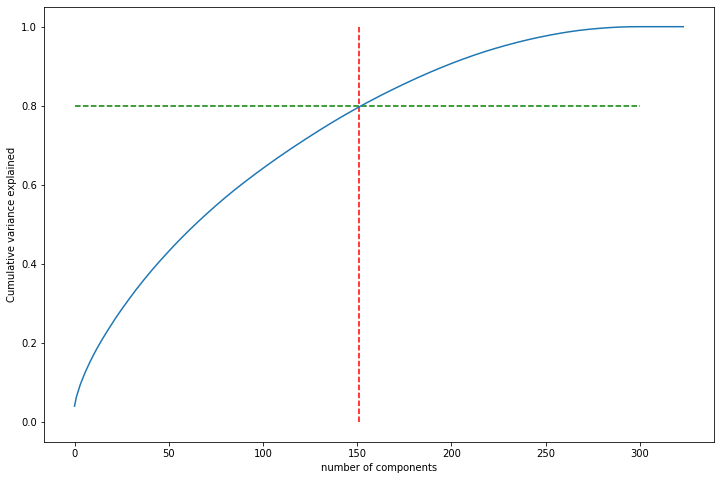

In [97]:
fig = plt.figure(figsize = (12,8))
plt.vlines(x=151, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.80, xmax=300, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.xlabel('number of components')
plt.ylabel("Cumulative variance explained")
plt.show()

In [98]:
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:  [4.  2.3 1.6 1.5 1.2 1.2 1.1 1.  1.  1.  0.9 0.9 0.9 0.8 0.8 0.8 0.8 0.8
 0.8 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.6 0.6 0.6 0.6 0.6 0.6
 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.4 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.

In [99]:
print (pca.explained_variance_ratio_.cumsum())

[0.04027203 0.0635649  0.07918518 0.09386742 0.10608925 0.11814719
 0.12928241 0.1396938  0.14989949 0.15980089 0.1691233  0.17824485
 0.18687528 0.19528948 0.20356419 0.21161115 0.21943057 0.22709035
 0.23473423 0.24223183 0.24965514 0.25701112 0.26424377 0.27127345
 0.27815081 0.2849718  0.2916636  0.29829566 0.30487628 0.31140848
 0.31786655 0.32422806 0.33055408 0.33680338 0.34290329 0.34892273
 0.35487448 0.36079458 0.36665075 0.37246967 0.37822554 0.38385637
 0.38942447 0.3949144  0.40036088 0.40572187 0.41104846 0.41629814
 0.42153166 0.4267435  0.43192581 0.43705848 0.44214968 0.44718367
 0.45217369 0.45715464 0.46210902 0.46693028 0.47172617 0.47645144
 0.48116417 0.48583483 0.49046717 0.49505061 0.49960897 0.50409689
 0.50856726 0.51299352 0.51740929 0.52179255 0.52613596 0.5304558
 0.53472559 0.53899026 0.54321768 0.54738282 0.5515188  0.55562734
 0.55972909 0.56379968 0.56783031 0.57180575 0.57575935 0.5796918
 0.58356996 0.58739308 0.59119858 0.59495995 0.59870316 0.602413

In [100]:
## Using Incremental PCA as dataset values are high and is faster and removes correlated features

In [101]:
## incremental PCA with 50 components as theplot shows .80 variance is explained with these number of components
pca_final = IncrementalPCA(n_components=50)

In [102]:
## fitting incremental PCA on X train
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21007, 50)

In [103]:
## forming correlationmatrix for principle components
corrmat = np.corrcoef(df_train_pca.transpose())

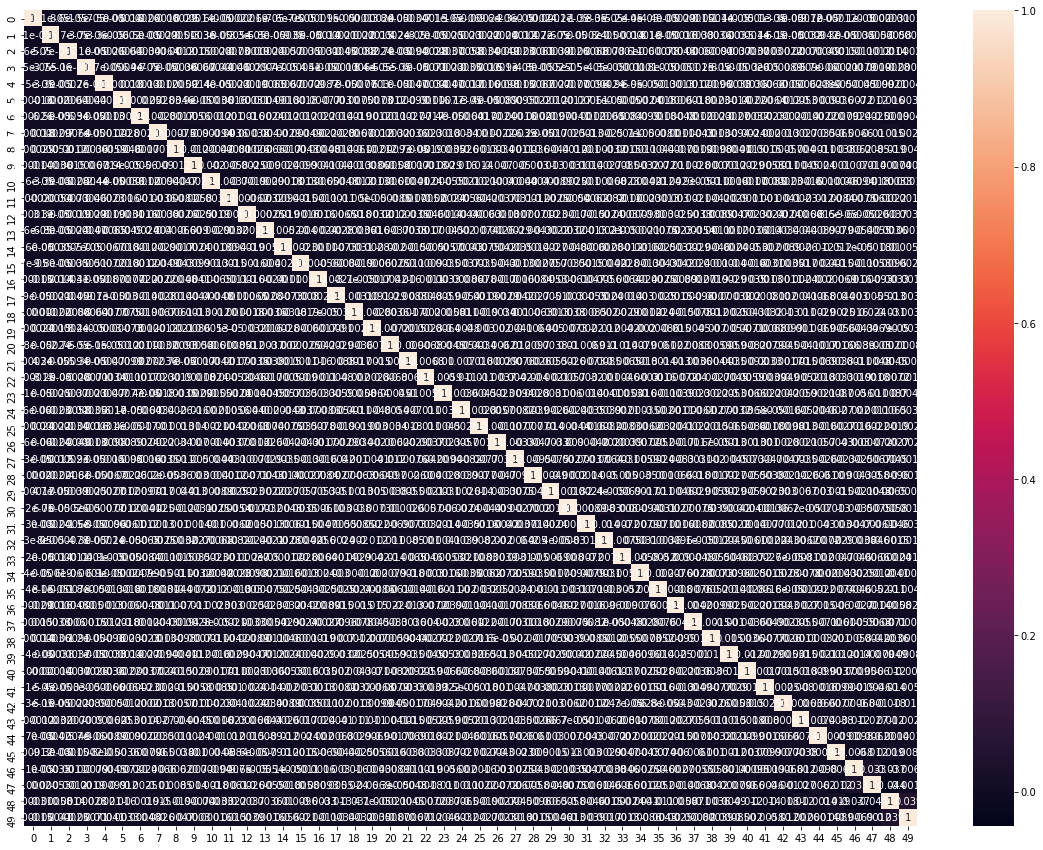

In [104]:
## Plotting correlation  matrix
%matplotlib inline
plt.figure(figsize = (20,15))
sns.heatmap(corrmat,annot = True)
plt.show()

In [105]:
## seeing max and min correlation values for components
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.038553987160841276 , min corr:  -0.04378900413964738


In [106]:
## Applying selected component on test data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9004, 50)

### Fitting Logistic Regression on train data by PCA

In [107]:
## fitting logistic regression
learner_logit_pca1=LogisticRegression()
model_logit_pca1 = learner_logit_pca1.fit(df_train_pca, y_train)

In [108]:
## Making prediction on test set
pred_probs_test = model_logit_pca1.predict_proba(df_test_pca)[:,1]


In [109]:
## checkingn roc_auc_score
"{:2.2}".format(roc_auc_score(y_test, pred_probs_test))

'0.87'

#### Inference
- model is good as the Area under the curve score =0.9

In [110]:
def plot_actual_vs_pred(actual, predicted,title):
    ## forming the dataframe from the actuala nd predicted values
    df_dict = {'actual': list (actual), 'prediction': list(predicted)}
    df = pd.DataFrame(df_dict)
    ## compute ranks bucketise the predicted and actual data
    pred_ranks = pd.qcut(df['prediction'].rank(method='first'), 100, labels=False)
    actual_ranks = pd.qcut(df['actual'].rank(method='first'), 100, labels=False)
    pred_percentiles = df.groupby(pred_ranks).mean()
    actual_percentiles = df.groupby(actual_ranks).mean()
    plt.title(title)
    ## plotting predicted and actual values against axis with increasing value of 0.01
    plt.plot(np.arange(.01, 1.01, .01), np.array(pred_percentiles['prediction']),
             color='red', lw=3, label='Prediction')
    plt.plot(np.arange(.01, 1.01, .01), np.array(pred_percentiles['actual']),
             color='green', lw=3, linestyle='--', label='Actual')
    plt.ylabel('Target Percentile')
    plt.xlabel('Population Percentile')
    plt.xlim([0.0, 1.0])
    plt.ylim([-0.05, 1.05])
    from pylab import rcParams
    rcParams['figure.figsize'] = 8, 6

    plt.legend(loc="best")
    plt.show()

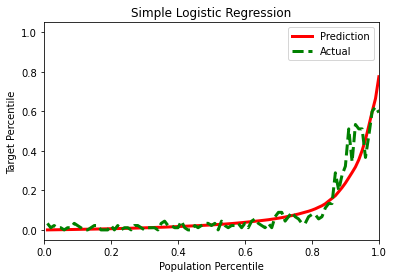

In [111]:
## plotting to see how the model has predicted
plot_actual_vs_pred(y_test.values,pred_probs_test,"Simple Logistic Regression")

In [112]:
pca_final2 = IncrementalPCA(n_components=150)
## fitting incremental PCA on X train
df_train_pca2 = pca_final2.fit_transform(X_train)
df_train_pca2.shape

(21007, 150)

In [113]:
## Applying selected component on test data
df_test_pca2 = pca_final2.transform(X_test)
df_test_pca2.shape

(9004, 150)

In [114]:
pca_final3 = IncrementalPCA(n_components=25)
## fitting incremental PCA on X train
df_train_pca3 = pca_final3.fit_transform(X_train)
df_train_pca3.shape

(21007, 25)

In [115]:
## Applying selected component on test data
df_test_pca3 = pca_final3.transform(X_test)
df_test_pca3.shape

(9004, 25)

In [116]:
pca_final4 = IncrementalPCA(n_components=15)
## fitting incremental PCA on X train
df_train_pca4 = pca_final4.fit_transform(X_train)
df_train_pca4.shape

(21007, 15)

In [117]:
## Applying selected component on test data
df_test_pca4 = pca_final4.transform(X_test)
df_test_pca4.shape

(9004, 15)

### Training Logistic regression again with different number of components from PCA

In [118]:
## fitting logistic regression with class weight balanced for taking care of class imbalance in churn 
## pca provided 150 componets
learner_logit_pca2=LogisticRegression(class_weight='balanced')
model_logit_pca2 = learner_logit_pca2.fit(df_train_pca2, y_train)

In [119]:
## amking prediction
pred_probs_test2 = model_logit_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(roc_auc_score(y_test, pred_probs_test2))

'0.89'

In [120]:
## fitting logistic regression with class weight balanced for taking care of class imbalance in churn
# pca provided 25 components
learner_logit_pca3=LogisticRegression(class_weight='balanced')
model_logit_pca3 = learner_logit_pca3.fit(df_train_pca3, y_train)

In [121]:
## amking prediction
pred_probs_test3 = model_logit_pca3.predict_proba(df_test_pca3)[:,1]
"{:2.2f}".format(roc_auc_score(y_test, pred_probs_test3))

'0.87'

In [122]:
## fitting logistic regression with class weight balanced for taking care of class imbalance in churn
#pca provided 15 components
learner_logit_pca4=LogisticRegression(class_weight='balanced')
model_logit_pca4 = learner_logit_pca4.fit(df_train_pca4, y_train)

In [123]:
## amking prediction
pred_probs_test4 = model_logit_pca4.predict_proba(df_test_pca4)[:,1]
"{:2.2f}".format(roc_auc_score(y_test, pred_probs_test4))

'0.87'

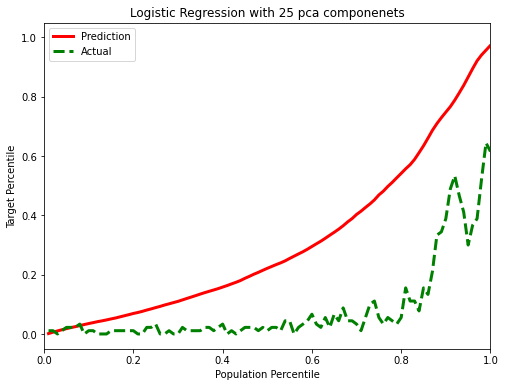

In [124]:
plot_actual_vs_pred(y_test.values,pred_probs_test3,"Logistic Regression with 25 pca componenets")

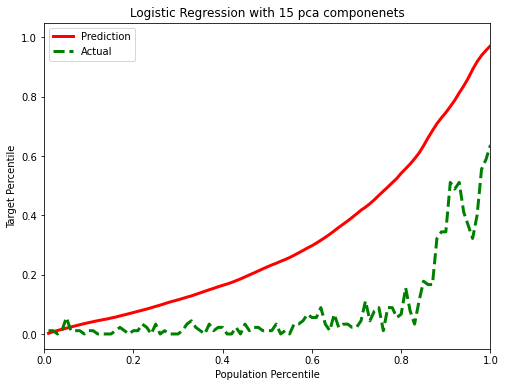

In [125]:
plot_actual_vs_pred(y_test.values,pred_probs_test4,"Logistic Regression with 15 pca componenets")

In [126]:
## predicting on train data an seeing the important metrics
predictions_pca3_train=model_logit_pca3.predict(df_train_pca3)
pred_probs_train3 = model_logit_pca3.predict_proba(df_train_pca3)[:,1]

print(classification_report(y_train, predictions_pca3_train))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89     19198
           1       0.30      0.82      0.44      1809

    accuracy                           0.82     21007
   macro avg       0.64      0.82      0.67     21007
weighted avg       0.92      0.82      0.86     21007



              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8220
           1       0.30      0.79      0.43       784

    accuracy                           0.82      9004
   macro avg       0.64      0.81      0.66      9004
weighted avg       0.92      0.82      0.85      9004

Accuracy for the test dataset of 25 PCA components 81.7%
Recall for the test dataset of 25 PCA components 79.3%
ROC for the test dataset of 25 PCA components 80.7%


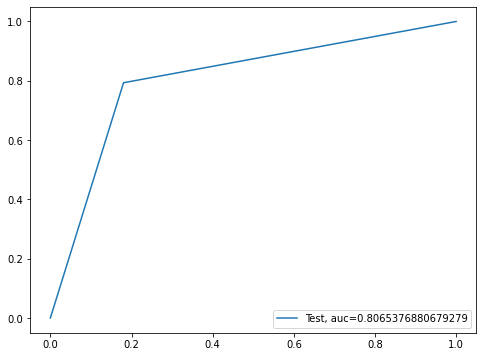

In [127]:
## Finding the prediction and recall score for Logistic Regression with 25 PCA components

predictions_pca3=model_logit_pca3.predict(df_test_pca3)
pred_probs_test3 = model_logit_pca3.predict_proba(df_test_pca3)[:,1]

print(classification_report(y_test, predictions_pca3))
accuracy = accuracy_score(y_test, predictions_pca3)
print("Accuracy for the test dataset of 25 PCA components",'{:.1%}'.format(accuracy) )

recall = recall_score(y_test, predictions_pca3)
print("Recall for the test dataset of 25 PCA components",'{:.1%}'.format(recall) )

fpr, tpr, threshold = roc_curve(y_test, predictions_pca3)
roc_auc = auc(fpr, tpr)
print("ROC for the test dataset of 25 PCA components",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

## Inference
- for Logisrtic regression with 25 PCA provided feature
- model is not overfitting , which can be evaluated based on recall and f1 score , which is same for test and train data

In [128]:
## predicting on train data an seeing the important metrics
predictions_pca4_train=model_logit_pca4.predict(df_train_pca4)
pred_probs_train4 = model_logit_pca4.predict_proba(df_train_pca4)[:,1]

print(classification_report(y_train, predictions_pca4_train))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89     19198
           1       0.30      0.81      0.44      1809

    accuracy                           0.82     21007
   macro avg       0.64      0.82      0.66     21007
weighted avg       0.92      0.82      0.85     21007



              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8220
           1       0.30      0.79      0.43       784

    accuracy                           0.82      9004
   macro avg       0.64      0.81      0.66      9004
weighted avg       0.92      0.82      0.85      9004

Accuracy for the test dataset of 15 PCA components 82.0%
Recall for the test dataset of 15 PCA components 79.3%
ROC for the test dataset of 15 PCA components 80.8%


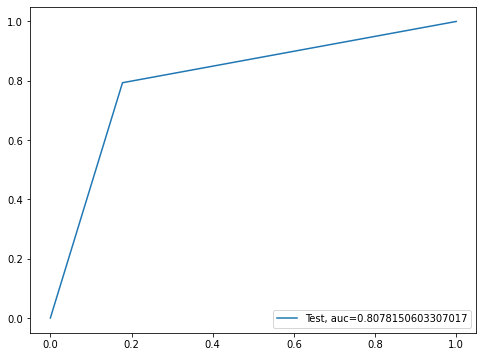

In [129]:
## Finding the prediction and recall score for Logistic Regression with 15 PCA components

predictions_pca4=model_logit_pca4.predict(df_test_pca4)
pred_probs_test4 = model_logit_pca4.predict_proba(df_test_pca4)[:,1]

print(classification_report(y_test, predictions_pca4))
accuracy = accuracy_score(y_test, predictions_pca4)
print("Accuracy for the test dataset of 15 PCA components",'{:.1%}'.format(accuracy) )

recall = recall_score(y_test, predictions_pca4)
print("Recall for the test dataset of 15 PCA components",'{:.1%}'.format(recall) )

fpr, tpr, threshold = roc_curve(y_test, predictions_pca4)
roc_auc = auc(fpr, tpr)
print("ROC for the test dataset of 15 PCA components",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

### inference
- Logistic Regression built on datframe given by PCA  with 150  gave ROC_AUC_SCORE = .89
- Logistic Regression built on datframe given by PCA  with 15 components, gave ROC_AUC_SCORE = .80
- SInce its classfication problem we need better Recall score and always model with less components is desired.
- So for validating other types of model we can use the PCA with 15 components with recall score of 79.3%
- Logistic regression with 15 PCA components is also good model as the test ans train f1=score and recall are almost same and there is no overfitting

## RANDOM FOREST

In [130]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [131]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 5, 10, 15, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [15,20,25],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [132]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [133]:
## fitting random forest gridsearch
grid_search.fit(df_train_pca4,y_train)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 1322 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    0.0s finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 15, 20],
                         'max_features': [15, 20, 25],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [134]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, max_features=15, min_samples_leaf=5,
                       n_estimators=50, n_jobs=-1, random_state=42)

### Building the model with best estimator and balanced weight model for evaluation

In [135]:
## building random forest with balanced subsample methods of classs weights
## Weights are computed on bootsrtrap sample of every tree
Random_forest_best=RandomForestClassifier(max_depth=20, max_features=15, min_samples_leaf=10,
                       n_estimators=50, n_jobs=-1, random_state=42,class_weight="balanced_subsample")

In [136]:
## FItting the randomw forest model on PCA with 15 components
Random_forest_final= Random_forest_best.fit(df_train_pca4,y_train)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8220
           1       0.49      0.64      0.56       784

    accuracy                           0.91      9004
   macro avg       0.73      0.79      0.75      9004
weighted avg       0.92      0.91      0.92      9004

Accuracy for the test data on 15 components from PCA 91.2%
Recal for the test dataset on 15 components from PCA 63.9%
ROC for the test data 78.8%


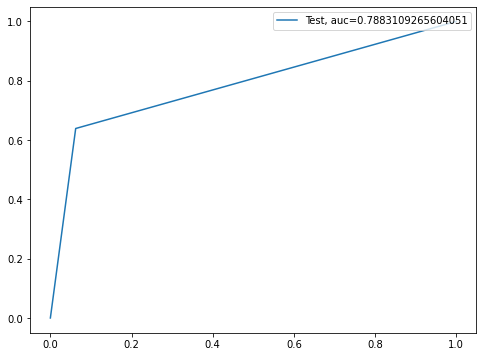

In [137]:
## predicting the on test data and seing accuracyca nd recall score
## using classification reprot to get multiple parameters on model evaliuation
pred_Random_forest_final=Random_forest_final.predict(df_test_pca4)
Random_for_final_pred=Random_forest_final.predict_proba(df_test_pca4)[:,1]

print(classification_report(y_test, pred_Random_forest_final))
accuracy = accuracy_score(y_test, pred_Random_forest_final)
print("Accuracy for the test data on 15 components from PCA",'{:.1%}'.format(accuracy) )
recall=recall_score(y_test, pred_Random_forest_final)
print("Recal for the test dataset on 15 components from PCA",'{:.1%}'.format(recall) )

fpr, tpr, threshold = roc_curve(y_test, pred_Random_forest_final)
roc_auc = auc(fpr, tpr)
print("ROC for the test data",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=1)
plt.show()

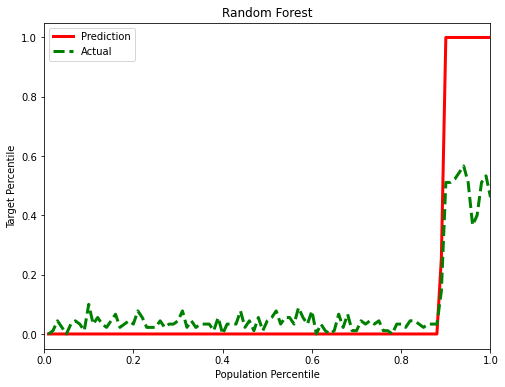

In [138]:
plot_actual_vs_pred(y_test.values,pred_Random_forest_final,"Random Forest")

In [139]:
## important features from best random forest model
importance_paramters = Random_forest_final.feature_importances_
col_names =  X.columns

Feature_importantance_sort = pd.DataFrame(sorted(zip(importance_paramters, list(col_names)), reverse=True),columns={'Feature','value'})
Feature_importantance_sort

,value,Feature
0,0.461664,onnet_mou_8
1,0.188537,arpu_8
2,0.042353,loc_og_t2f_mou_8
3,0.033356,std_og_mou_8
4,0.032325,loc_og_t2c_mou_8
5,0.031892,loc_og_t2m_mou_8
6,0.030528,spl_og_mou_8
7,0.030221,og_others_8
8,0.026328,offnet_mou_8
9,0.025411,loc_og_t2t_mou_8


#### Inference
- Random Forest with max_depth=20, max_features=4, min_samples_leaf=10 gave a recall score of 65% percentage for 15 components provided by pca and accuracy of 90%
          

## AdaBoost

In [140]:
# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 48)

In [141]:
# fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# test error
y_pred = shallow_tree.predict(X_test)
score = accuracy_score(y_test, y_pred)
score

0.9316970235450911

In [142]:
# adaboost with the tree as base estimator and provide range of trees

estimators = list(range(5, 100, 5))

abc_scores = []
recall_scores =[]
for n_est in estimators:
    ABC = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = n_est, random_state=101)
    
    ABC.fit(X_train, y_train)
    y_pred = ABC.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    recal=recall_score(y_test, y_pred)
    recall_scores.append(recal)
    abc_scores.append(score)

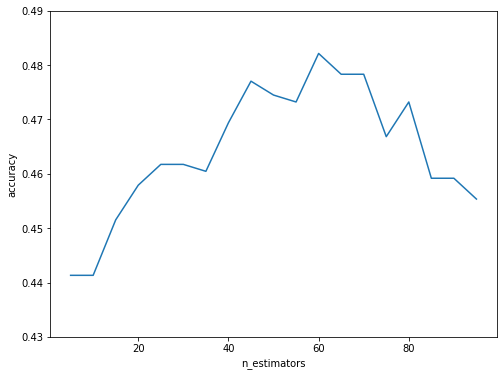

In [143]:
plt.plot(estimators, recall_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0.43,.49])
plt.show()

#### Inference
- From aove graph we can see the accuracy is better estimators =68


classification report 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      8220
           1       0.62      0.48      0.54       784

    accuracy                           0.93      9004
   macro avg       0.79      0.73      0.75      9004
weighted avg       0.92      0.93      0.93      9004

Accuracy for the test dataset 93.0%
Recall for the test dataset 48.2%
ROC for the test dataset 72.7%


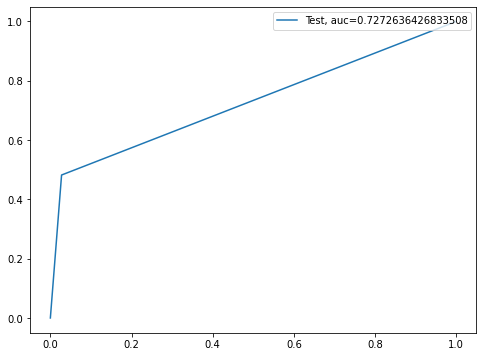

In [144]:
ABC = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = 60)
    
ABC.fit(X_train, y_train)
prediction = ABC.predict(X_test)
score = accuracy_score(y_test, prediction)
accuracy = accuracy_score(y_test, prediction)
recall = recall_score(y_test, prediction)
print("classification report ")
print(classification_report(y_test,prediction))
fpr, tpr, threshold = roc_curve(y_test, prediction)
roc_auc = auc(fpr, tpr)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )
print("Recall for the test dataset",'{:.1%}'.format(recall) )
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=1)
plt.show()

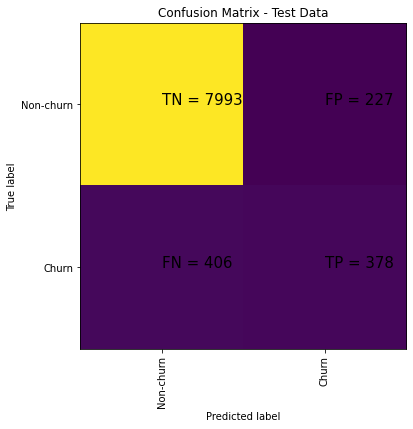

In [145]:
cm = confusion_matrix(y_test, prediction)
plt.clf()
plt.imshow(cm, interpolation='nearest')
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=15)
plt.show()

#### Inference
- from the AUC we can see that  n_estimators = 60 provided best REcalls core of 48% only even though the accusracy is 93%

## XGBoost

In [146]:
## xgboost with stratifited
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=48)

xgb_model = xgb.XGBClassifier(
    n_estimators=250,
    learning_rate=0.05,
    colsample_bytree=0.55,
    cv = cv,
    scoring='roc_auc'
)

xgb_model.fit(X=X_train,y=y_train)

XGBClassifier(colsample_bytree=0.55,
              cv=StratifiedKFold(n_splits=4, random_state=48, shuffle=True),
              learning_rate=0.05, n_estimators=250, scoring='roc_auc')

classification report 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      8220
           1       0.74      0.50      0.60       784

    accuracy                           0.94      9004
   macro avg       0.85      0.74      0.78      9004
weighted avg       0.94      0.94      0.94      9004

Accuracy for the test dataset 94.1%
Recall for the test dataset 50.4%
ROC for the test dataset 74.3%


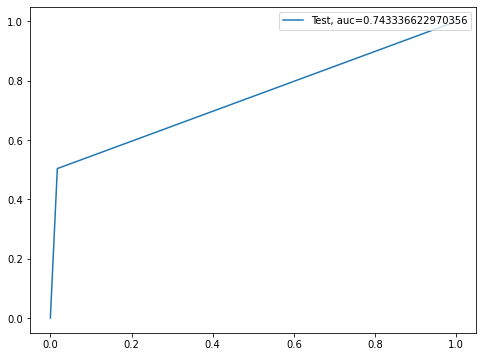

In [147]:
## pricting on test data and seeign the evaluation metrics for xgboost
predictions = xgb_model.predict(X_test)
ABC.fit(X_train, y_train)
prediction = ABC.predict(X_test)
score = accuracy_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print("classification report ")
print(classification_report(y_test,predictions))
fpr, tpr, threshold = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )
print("Recall for the test dataset",'{:.1%}'.format(recall) )
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=1)
plt.show()

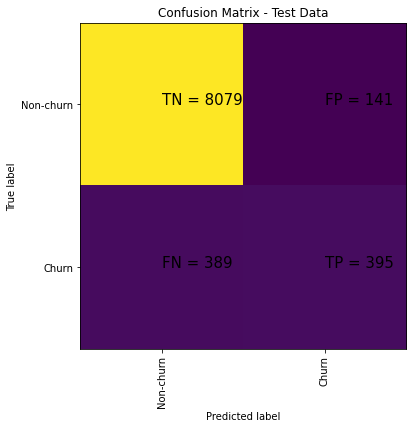

In [148]:
## Seeing the confusion matrix for the model evealuation
cm = confusion_matrix(y_test, predictions)
plt.clf()
plt.imshow(cm, interpolation='nearest')
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=15)
plt.show()

#### Inference fo XGBoost
- For XGBoost the model Accuracy for the test dataset 94.1% and Recall for the test dataset 50.4%

# Summary Inference on Models
1. Different models trained for classification
2. Random Forest is the best model obtained with Recall Score = 65 % and Accuracy of 90%.
    - Random forest was modelled using top 15 components given by PCA
3. AUC_RUC curve, Recall_Score and Accuracyc were used to compare model performance.
3. This Random Forest model can be used for deploying the model.

### Building Model to derive important features

In [149]:
## Since Random Forest was our best model using pCA
## going with Random forest to get max 100 features
RF_final=RandomForestClassifier(max_features=100, n_estimators=200, max_depth=15,random_state=48, class_weight='balanced')
RF_final.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, max_features=100,
                       n_estimators=200, random_state=48)

In [150]:
## Seeing the import features guven by model
importances = RF_final.feature_importances_
col_names =  X.columns

RF_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True))
RF_feature_importance.columns=['values','feature']
RF_feature_importance.head()

,values,feature
0,0.101264,loc_og_mou_8
1,0.097490,arpu_8
2,0.083719,loc_og_t2m_mou_8
3,0.068689,last_day_rch_amt_8
4,0.061644,loc_ic_t2m_mou_8


In [151]:
##extractng top 25 features for final Random Forest Model to derive the top features affecting churn
imp_features = RF_feature_importance.head(25)
imp_features.head()

,values,feature
0,0.101264,loc_og_mou_8
1,0.097490,arpu_8
2,0.083719,loc_og_t2m_mou_8
3,0.068689,last_day_rch_amt_8
4,0.061644,loc_ic_t2m_mou_8


In [152]:
## Making sure we get the unique records
X_final = X[list(imp_features.feature.unique())]
Y_final = y

In [153]:
##scalign the X data before splitting
X_final_scaled = scaler.fit_transform(X_final)
X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X_final_scaled,Y_final, train_size=0.7,test_size=0.3,random_state=48)

In [154]:
## Fititng the final model 
RF_feature_extract=RandomForestClassifier(n_estimators=100, max_depth=12,random_state=48, class_weight='balanced_subsample')
RF_feature_extract.fit(X_final_train, y_final_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=12,
                       random_state=48)

In [155]:
## predicting on train data an seeing the important metrics
RF_feature_extract_pred_train = RF_feature_extract.predict(X_final_train)
print(classification_report(y_final_train, RF_feature_extract_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     19198
           1       0.72      0.95      0.82      1809

    accuracy                           0.96     21007
   macro avg       0.86      0.96      0.90     21007
weighted avg       0.97      0.96      0.97     21007



In [156]:
## predicting on test data an seeing the important metrics
RF_feature_extract_pred_test = RF_feature_extract.predict(X_final_test)
print(classification_report(y_final_test, RF_feature_extract_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8220
           1       0.60      0.66      0.63       784

    accuracy                           0.93      9004
   macro avg       0.78      0.81      0.79      9004
weighted avg       0.93      0.93      0.93      9004



In [157]:
## checking recal and accuracy score
recall = recall_score(y_test, RF_feature_extract_pred_test)
accuracy = accuracy_score(y_test, RF_feature_extract_pred_test)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )
print("Recall for the test dataset",'{:.1%}'.format(recall) )

Accuracy for the test dataset 93.2%
Recall for the test dataset 65.7%


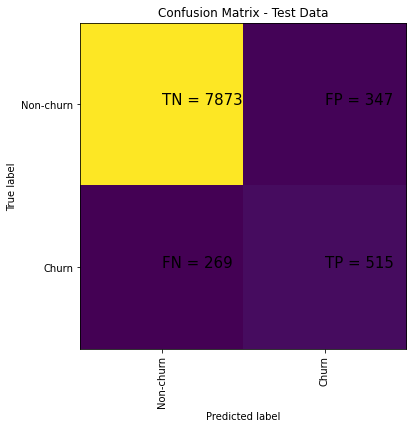

In [158]:
# Seeing the confusion matrix for the model evealuation
cm = confusion_matrix(y_test, RF_feature_extract_pred_test)
plt.clf()
plt.imshow(cm, interpolation='nearest')
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=15)
plt.show()

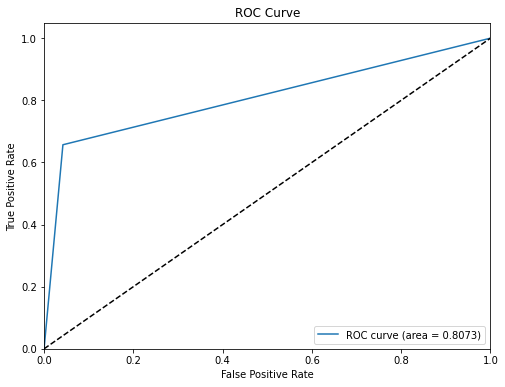

In [159]:
# Perforamnce of the model by eeing  ROC-AUC curve
fpr, tpr, _ = roc_curve(y_final_test, RF_feature_extract_pred_test)
AUC  = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % AUC)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### Inference
- Random Forest algorith modeled with 25 top Features is modeled to get the top pfeatures to identify churn
- This model has good performance when evaluated based in auc-roc scoe, recall and acuuracy
    - Recall - 65.7
    - Accuracy - 93.2
    - AUC-ROC - .80

In [160]:
imp_features

,values,feature
0,0.101264,loc_og_mou_8
1,0.097490,arpu_8
2,0.083719,loc_og_t2m_mou_8
3,0.068689,last_day_rch_amt_8
4,0.061644,loc_ic_t2m_mou_8
5,0.041341,roam_og_mou_8
6,0.028929,roam_ic_mou_8
7,0.025741,max_rech_amt_8
8,0.025501,roam_og_mou_8_7_diff
9,0.018759,loc_ic_t2t_mou_8


## Recommendation
- Below are top 5 identifiers for churn
    1. Local outgoing minutes in 8th month.
    2. Average Revenue Per user in th month.
    3. Local Outgoing minutes to other operator mobile.
    4. Last recharge amount.
    5. Roaming outgoing minutes.
    6. Max recharge amount.
    
- If recharge Amount is reduced in 8th month its sign of user going to churn.
- If total outgoing minutes redduced in 8th month then its sign of churn.
- Roaming outgoing minutes reduction also means churn .
- Roaming outgoing minutes if its reduced from 7th month, its possiblity towards churn.
- STD outgoing minutes if reduced in 7tj month compareed to 8th month. are few of inidcation that user is about to churn

    